In [1]:
import librosa
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from librosa import core, onset, feature, display
import soundfile as sf
import umap
from IPython.display import Audio
import sklearn

In [2]:
df = pd.read_csv("C:\\Users\\HP\\Desktop\\Gargi\\PROJECT4\\birdsong_metadata.csv")

In [3]:
df.head()

file_id         genus    species   english_cname who_provided_recording  \
0   132608      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
1   132611      Acanthis    flammea  Common Redpoll         Jarek Matusiak   
2    35068      Acanthis    flammea  Common Redpoll             Sander Bot   
3    82715  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   
4    64685  Acrocephalus  palustris   Marsh Warbler         Dougie Preston   

          country  latitude  longitute                     type  \
0          Poland   50.7932    15.4995       female, male, song   
1          Poland   50.7932    15.4995  flight call, male, song   
2     Netherlands   52.8176     6.4326               call, song   
3  United Kingdom   60.3539    -1.2689                     Song   
4  United Kingdom   60.3539    -1.2689                     Song   

                                             license  
0  http://creativecommons.org/licenses/by-nc-sa/3.0/  
1  http://creativecommons.org/licenses/by-nc-sa/3.0/  
2  http://creativecommons.org/licenses/by-nc-nd/2.5/  
3  http://creativecommons.org/licenses/by-nc-nd/2.5/  
4  http://creativecommons.org/licenses/by-nc-nd/2.5/

In [4]:
def load_audio(file_id):
    data, samplerate = sf.read("C:\\Users\\HP\\Desktop\\Gargi\\PROJECT4\\songs\\songs\\xc"+str(file_id)+".flac")
    s = len(data)/samplerate
    print(s)
    print(samplerate)
    print (data)
    print (data.shape)
    print(len(data))
    print('data',data[:100])
    sg = feature.melspectrogram(data, sr=44100, hop_length=512)
    print('shape',sg.shape)
    print(sg[0:128,0])

    # Take mean amplitude M from frame with highest energy
    centerpoint = np.argmax(sg.mean(axis=0))
    M = sg[:,centerpoint].mean()
    print(centerpoint)
    print(M)
    print(sg[:,centerpoint].shape)
    # Filter out all frames with energy less than 5% of M
    mask = sg.mean(axis=0)>=M/20
    print('len of mask ' + str(len(mask)))
    print(type(mask[0]))
    print(type(sg))
    print(sg.shape)
    print(len(sg))
    audio_mask = np.zeros(len(data), dtype=bool)
    for i in range(0,len(mask)):
        audio_mask[i*512:] = mask[i]
    return sg, mask, data, audio_mask, samplerate

In [5]:

load_audio(132608)


38.55673469387755
44100
[0. 0. 0. ... 0. 0. 0.]
(1700352,)
1700352
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

(array([[4.21860900e-10, 4.44117574e-06, 6.57122662e-04, ...,
         1.29150129e-03, 1.84193148e-05, 7.51467089e-10],
        [6.48808103e-10, 6.41215368e-06, 1.84442431e-04, ...,
         2.03529335e-03, 2.22064124e-05, 1.10440544e-08],
        [5.14833355e-10, 7.32250703e-06, 5.90854130e-04, ...,
         6.20448789e-04, 1.77508878e-05, 1.08017059e-08],
        ...,
        [1.23499364e-09, 2.13986484e-07, 1.12590222e-05, ...,
         7.63826102e-06, 2.73634660e-07, 2.11434825e-09],
        [1.35097530e-09, 3.91423691e-08, 1.88197410e-06, ...,
         3.91793299e-06, 1.70616835e-07, 1.55224896e-09],
        [1.38394476e-09, 1.66104254e-08, 2.69051227e-07, ...,
         1.81083674e-07, 5.96534500e-09, 9.70368574e-10]]),
 array([False, False, False, ..., False, False, False]),
 array([0., 0., 0., ..., 0., 0., 0.]),
 array([False, False, False, ..., False, False, False]),
 44100)

In [6]:
df['length'] = np.zeros(len(df))
#print(df['length'])

waves = {}
print(type(waves))
for file_id in df['file_id']:
    sg, mask, data, audio_mask, samplerate = load_audio(file_id)
    waves[file_id] = data[audio_mask]
    df.loc[df['file_id'] == file_id,'length'] = len(data[audio_mask])
    

<class 'dict'>
38.55673469387755
44100
[0. 0. 0. ... 0. 0. 0.]
(1700352,)
1700352
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

16.22204081632653
44100
[0. 0. 0. ... 0. 0. 0.]
(715392,)
715392
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.

shape (128, 1515)
[1.23200800e-09 8.17991603e-10 1.15603337e-09 3.11442782e-09
 1.86854820e-09 3.31015028e-09 1.52583896e-09 8.20126620e-10
 4.35598133e-09 3.21944514e-09 2.35391281e-09 1.14756783e-09
 8.74888840e-09 2.95258376e-08 4.22466355e-08 9.85540362e-08
 3.30691635e-08 1.27769640e-08 6.74698037e-09 4.94748709e-08
 1.44874883e-07 1.23129548e-07 3.62428768e-08 2.50192319e-09
 2.63697138e-09 6.40407659e-08 8.39623126e-08 1.41789736e-07
 1.87868547e-08 1.60441551e-08 1.90233050e-08 6.40511750e-08
 3.52046504e-09 2.23547849e-09 5.01305811e-09 1.01969540e-08
 9.48502996e-08 1.52653844e-07 1.05528425e-07 5.46629125e-08
 2.87522333e-08 1.63659944e-08 1.46183483e-08 1.46564932e-08
 1.56287172e-08 6.14840184e-09 7.59110716e-08 1.79132779e-07
 8.85423122e-08 4.11921656e-09 1.56164865e-09 7.85711701e-09
 5.12047656e-08 1.68963999e-07 7.30977524e-08 3.54817829e-08
 5.71859540e-08 4.56517105e-08 1.95983770e-08 2.84662552e-09
 3.09634648e-09 2.46128973e-08 1.30922345e-07 4.80049202e-08
 1.382

7.549160997732426
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -3.05175781e-05]
(332918,)
332918
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

shape (128, 9293)
[3.44804419e-08 3.16457084e-08 3.37830112e-09 2.54957031e-09
 3.94495752e-09 2.91261249e-09 2.81501237e-09 3.67075012e-09
 4.01698780e-09 2.05402527e-09 1.68874620e-09 1.37572818e-09
 1.39165672e-11 1.36639640e-11 1.78920784e-11 2.44580503e-10
 8.30871466e-10 9.84465786e-10 8.27015119e-10 8.59688426e-10
 5.36594449e-09 3.81605388e-09 3.07611309e-09 2.99197702e-10
 6.12984776e-10 1.52871214e-09 1.87572567e-09 4.34023548e-10
 6.73285879e-10 2.96128968e-10 4.21556968e-10 1.98945110e-10
 9.88682414e-11 6.76904671e-11 1.74197033e-09 4.15856963e-09
 1.06429226e-08 5.91455724e-09 3.51733799e-09 1.47017552e-09
 4.76682074e-09 6.85901605e-09 6.42716912e-09 2.15686077e-09
 3.49480353e-10 1.39700097e-09 6.48006070e-10 1.85117139e-09
 1.01261529e-08 5.24233668e-09 2.01759824e-09 4.46493964e-09
 2.55217245e-09 3.33896151e-09 1.78128528e-09 2.71042718e-09
 1.53833242e-09 1.51435812e-09 1.16240766e-09 8.44822360e-09
 1.00350008e-08 3.37821549e-09 1.05966470e-09 6.71920359e-10
 6.207

shape (128, 2188)
[1.75670191e-10 2.72116968e-09 9.22012572e-09 4.07830250e-10
 8.97236221e-09 1.39247296e-08 5.74403903e-08 2.41975637e-08
 1.32132049e-08 1.91485449e-09 2.27847320e-09 8.04291748e-09
 1.70910696e-09 4.48272376e-09 4.53217595e-10 2.09734051e-09
 1.21674105e-08 1.05760916e-08 4.71130198e-09 2.80953546e-09
 7.11874314e-09 2.12004379e-08 1.57154513e-07 5.05128300e-08
 4.05113101e-08 8.45685978e-08 1.40406005e-07 1.39061285e-07
 1.63559417e-07 3.41833797e-08 9.24613901e-09 3.72092713e-08
 2.19762662e-07 1.52073350e-07 6.65714991e-08 1.87804155e-08
 1.45816706e-07 1.29548170e-07 2.45421941e-08 6.06681665e-08
 1.00256466e-07 2.57841010e-07 5.21263445e-07 5.72328285e-07
 3.24936397e-07 1.35868490e-07 2.71995392e-08 5.78606491e-08
 1.05566383e-08 1.34020418e-08 4.25194765e-09 1.69607173e-08
 2.50464978e-08 1.40278890e-08 1.60081641e-08 4.97713608e-08
 7.35457855e-08 6.10918237e-08 2.14294622e-08 1.95912756e-08
 1.51165603e-08 1.61149615e-08 3.54626658e-08 1.08028925e-07
 7.814

shape (128, 20716)
[1.70346692e-07 1.70068054e-07 2.57406659e-08 1.73157697e-08
 9.14188898e-09 4.89904303e-09 1.07367562e-08 2.04968613e-08
 4.52930923e-09 6.34560377e-09 3.92586061e-09 6.29017655e-10
 6.58037742e-10 1.22436657e-08 1.56570891e-08 3.05942896e-08
 2.60245634e-08 1.58728949e-08 6.15989379e-09 2.64831144e-08
 6.25925258e-08 2.74541915e-08 9.35810649e-09 1.88168738e-08
 1.77657906e-08 8.77531900e-09 7.24741434e-09 3.72599229e-09
 1.50663193e-09 3.96340376e-09 1.61355699e-09 1.23446666e-08
 1.59661787e-08 9.64960316e-09 5.83870273e-09 7.63710434e-09
 4.86256272e-09 1.19348387e-08 1.85543529e-07 6.31556157e-07
 8.29497587e-07 3.32330125e-07 6.12559719e-08 6.82275706e-08
 4.37817152e-08 4.78202876e-08 2.45499124e-08 1.26033917e-07
 1.08477665e-07 2.63031276e-08 1.27155791e-07 2.73688350e-07
 1.72485789e-07 3.31082386e-08 1.43252217e-07 2.52913254e-07
 2.41221161e-07 7.42492597e-08 7.01930709e-08 5.50664220e-08
 4.34073487e-09 5.25440767e-08 4.07465766e-08 2.77788838e-08
 4.72

151.37936507936507
44100
[0. 0. 0. ... 0. 0. 0.]
(6675830,)
6675830
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 13039)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
3377
6.946116438321784
(128,)
len of mask 13039
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 13039)
128
83.85283446712018
44100
[0. 0. 0. ... 0. 0. 0.]
(3697910,)
3697910
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 

shape (128, 2671)
[1.55080587e-08 1.18267779e-08 2.22335997e-10 8.54195543e-10
 3.11190919e-10 8.72637683e-10 1.20481762e-09 2.77682537e-10
 3.89494369e-10 3.67553821e-11 3.78275055e-10 2.02988575e-09
 2.66849981e-09 3.62053023e-09 1.64358726e-10 7.19448510e-10
 1.10512950e-09 1.67223039e-09 2.25633173e-09 1.43801245e-09
 1.82247741e-09 1.75616962e-09 3.00242148e-10 1.34379371e-10
 5.08293663e-10 1.82949095e-10 2.80293941e-10 1.49489497e-10
 5.63898923e-10 1.99321200e-09 2.40749642e-09 2.71588267e-09
 1.56550748e-09 1.31296636e-09 3.70565848e-10 1.43659048e-09
 1.75645915e-09 1.58481911e-09 1.58383095e-09 7.65149622e-10
 2.42694588e-09 4.17266664e-09 2.96174047e-09 1.33490343e-09
 9.95204742e-10 3.59620697e-10 5.78657648e-10 1.65391745e-09
 1.69954684e-09 6.26483723e-10 1.30914611e-10 8.15245973e-10
 6.11439179e-10 5.51990438e-10 1.50345765e-09 8.42107783e-10
 7.51644361e-10 1.44531117e-09 1.68996491e-09 1.22750559e-09
 3.49514983e-10 6.79679138e-10 1.00174136e-09 1.21365085e-09
 5.115

45.21578231292517
44100
[0. 0. 0. ... 0. 0. 0.]
(1994016,)
1994016
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00]
shape (128, 1672)
[3.85421882e-09 2.34593838e-09 2.43927239e-11 1.03716502e-09
 1.98946785e-09 3.07269135e-10 3.30899775e-10 1.02450177e-10
 1.42287691e-10 1.48825017e-11 3.09907904e-10 1.39586461e-10
 4.23500325e-10 5.03307571e-10 4.81886633e-10 6.29196718e-10
 1.25954373e-09 1.57056972e-09 1.48749324e-09 3.84401919e-09
 9.88815862e-10 8.68998555e-10 1.22674276e-09 2.11787526e-10
 1.52150876e-09 9.22649190e-10 5.03599127e-10 1.57188433e-09
 1.73482750e-09 1.53545075e-09 1.38375040e-09 3.16255567e-10
 3.76782696e-10 4.28816898e-11 1.63104542e-10 8.53925021e-11
 5.09884300e-10 2.66451574e-10 6.96383710e-11 6.39002405e-10
 2.56156757e-09 1.22793370e-09 6.57784612e-10 1.60908225e-09
 1.48552187e-09 1.90014475e-09 7.94430992e-10 5.99129911e-10
 8.89401115e-10 1.74946249e-09 3.70141483e-10 1.45359239e-10
 1.10031084e-09 5.39749970e-10 4.86018398e-10 3.78827825e-10
 1.14505814e-09 1.46141975e-09 9.68869944e-10 1.81879186e-09
 

46.10589569160998
44100
[0. 0. 0. ... 0. 0. 0.]
(2033270,)
2033270
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

14.680589569160997
44100
[0. 0. 0. ... 0. 0. 0.]
(647414,)
647414
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

shape (128, 2145)
[2.82660465e-07 8.73048612e-07 1.43802112e-07 5.36587362e-08
 5.00660514e-08 1.16221391e-08 5.17157264e-09 1.84280569e-09
 8.16224437e-09 7.94366367e-09 1.05807906e-08 3.57793490e-08
 3.04577597e-08 1.59429313e-08 1.53470845e-08 1.11113403e-08
 9.07250529e-10 5.30838446e-08 5.46681080e-07 2.13624214e-06
 3.43462665e-06 2.76612672e-06 1.35901387e-06 4.59293201e-08
 1.38126557e-06 7.14416979e-07 3.94515325e-07 4.17813298e-07
 3.10824234e-06 2.24474546e-06 1.80488874e-06 6.65356605e-08
 4.68984386e-07 2.26716656e-07 4.73469642e-08 1.90740018e-08
 4.45412397e-07 7.36613875e-07 2.13206056e-07 3.18809835e-07
 9.58946385e-07 7.31478009e-07 2.63460109e-07 9.82960764e-07
 8.54634661e-07 1.80332130e-07 2.81489165e-07 9.23141773e-07
 2.54306857e-06 2.78382411e-06 1.45792418e-06 8.53827309e-07
 2.34538896e-07 8.53337547e-07 1.04557592e-06 6.21708140e-07
 9.69592741e-07 7.24034473e-07 6.05024915e-07 5.73091271e-07
 2.92055781e-07 2.95720373e-07 1.20195350e-07 2.99539832e-07
 2.865

44100
[0.         0.         0.         ... 0.00012207 0.00018311 0.00015259]
(1547126,)
1547126
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 3022)
[4.81221844e-10 1.06107505e-10 1.36229508e-10 1.32735218e-10
 1.80226634e-10 5.01969321e-11 1.25528213e-10 7.28450318e-11
 5.82608028e-12 2.42930866e-13 3.80635896e-11 1.06313686e-10
 3.45031517e-11 4.03032562e-11 1.50369056e-11 2.18270759e-11
 1.67957047e-11 1.36958134e-11 9.96808019e-12 2.46399404e-12
 7.58048264e-13 4.57915285e-12 3.96325210e-11 2.76205185e-11
 3.24454149e-12 1.89133324e-11 2.85967888e-11 8.43932317e-11
 1.25121716e-10 5.37207022e-11 8.39038892e-11 1.35303524e-11
 7.09083718e-12 2.07030820e-11 2.44341150e-11 2.11795480e-11
 9.07775220e-12 8.4388852

52.24777777777778
44100
[0. 0. 0. ... 0. 0. 0.]
(2304127,)
2304127
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 4501)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
4148
1.5123555381562488
(128,)
len of mask 4501
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 4501)
128
55.75179138321995
44100
[0. 0. 0. ... 0. 0. 0.]
(2458654,)
2458654
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 

shape (128, 9077)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
631
3.529672686200609
(128,)
len of mask 9077
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 9077)
128
6.687120181405896
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00 -3.05175781e-05]
(294902,)
294902
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000

shape (128, 455)
[4.12421630e-07 1.14912109e-06 5.59494682e-07 7.24256300e-07
 3.16592245e-07 1.03036279e-06 2.85263649e-06 4.10687627e-06
 5.61785296e-06 1.59609350e-06 1.01464434e-06 1.23286586e-07
 8.51879112e-08 3.69669135e-08 6.76723139e-08 2.35875660e-06
 2.91152352e-06 2.13832412e-06 8.95738915e-07 5.23490839e-07
 2.47149556e-06 2.42424008e-06 1.35926339e-06 9.04889780e-08
 1.64063192e-06 9.69154338e-07 8.13217307e-07 1.98830473e-06
 6.14956681e-06 3.80965950e-06 3.45553731e-06 4.38928428e-06
 2.00227216e-06 1.16466160e-06 5.03539235e-07 1.02596054e-08
 5.01152747e-09 1.05403701e-06 1.98203766e-06 1.36631139e-06
 5.93223357e-07 2.37703996e-07 9.17250042e-08 3.92270660e-07
 1.00529321e-06 1.13163335e-06 2.71084075e-07 2.99391710e-07
 1.03832696e-07 1.08421057e-07 5.89256906e-07 2.79880173e-07
 1.40185353e-08 1.33582541e-07 1.16124367e-06 8.80183875e-07
 1.35504199e-07 8.79712262e-08 1.32548720e-07 1.55351178e-07
 2.18698669e-07 2.95422672e-07 3.39920037e-07 9.45527782e-08
 4.7121

8.385079365079365
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00 -3.05175781e-05]
(369782,)
369782
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

157.75179138321997
44100
[0. 0. 0. ... 0. 0. 0.]
(6956854,)
6956854
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05 -3.05175781e-05  3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

shape (128, 2329)
[2.91310050e-09 2.05740822e-09 1.90118605e-10 4.25043296e-10
 1.35309860e-09 4.63134043e-10 7.64697887e-11 1.23796070e-10
 1.44204016e-10 2.51841785e-10 4.31364339e-10 3.73481083e-10
 1.13085978e-09 8.45861966e-10 1.14983052e-10 1.11324130e-10
 1.93334532e-11 1.75512609e-11 5.04999116e-10 1.76451800e-09
 5.28324584e-10 4.33578501e-10 7.21857470e-10 6.44776984e-10
 1.56953535e-10 1.09988468e-09 5.98954808e-10 3.01468390e-10
 1.45158561e-10 4.32713310e-10 1.23660991e-09 4.34472766e-10
 3.18868636e-10 3.20977531e-10 1.24746798e-10 2.52670007e-10
 8.88252597e-11 7.60859617e-11 1.83297212e-10 5.11953865e-10
 3.86636489e-10 8.17287875e-10 3.08755525e-09 1.68861736e-09
 3.57540737e-10 1.03500331e-09 1.05082046e-09 2.96639094e-10
 1.31100569e-10 1.09211154e-09 1.15733283e-09 1.33230085e-09
 8.13370005e-10 2.05895852e-10 4.31516294e-10 3.75793481e-10
 1.66340479e-10 7.19149358e-10 4.57927352e-10 2.16596258e-10
 3.66469349e-10 8.56043081e-10 7.66621747e-10 1.14992382e-09
 3.318

6.425895691609977
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(283382,)
283382
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00

shape (128, 5781)
[2.88907001e-09 2.32690491e-09 2.26209937e-10 9.54045125e-10
 1.46654314e-09 3.03764442e-10 1.52551186e-10 3.13136996e-10
 1.66266555e-10 3.84584811e-10 2.40088002e-10 4.16248106e-10
 1.02505058e-09 4.31576035e-10 3.43699468e-10 5.43826254e-10
 1.58508334e-09 5.70981082e-10 3.77224364e-10 2.71043601e-10
 3.94787506e-10 2.70989562e-09 1.24808528e-09 8.43193781e-10
 7.22282212e-10 2.23246969e-10 6.34016527e-10 3.05458549e-10
 1.20854303e-11 1.39706229e-11 1.61672366e-11 1.16648645e-10
 3.14712424e-10 9.82505528e-11 7.03024490e-11 3.80055604e-10
 3.93386372e-10 3.01619143e-10 1.91341938e-10 4.41085009e-10
 1.06117048e-09 4.91275927e-10 4.46587983e-10 2.11325850e-09
 7.61617048e-10 2.19459991e-10 2.59826578e-10 1.52448953e-10
 1.45559319e-10 1.93143522e-10 3.66816011e-10 6.50296556e-10
 6.80402976e-10 1.37087355e-10 1.01092572e-10 1.49760449e-09
 1.10236093e-09 1.20965753e-09 1.03968535e-09 4.38998558e-10
 5.69441544e-10 1.00046712e-09 6.02915796e-10 2.08990759e-09
 1.248

38.948344671201816
44100
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05175781e-05
 0.00000000e+00 0.00000000e+00]
(1717622,)
1717622
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 3355)
[3.94982793e-11 3.83663764e-11 1.78562433e-11 5.09596628e-11
 1.30246478e-10 4.81086263e-11 6.27366254e-11 8.24258493e-12
 4.23722717e-11 6.56360487e-11 6.20124438e-11 5.51538800e-11
 1.04583617e-11 1.98458014e-11 2.29228657e-11 5.61313210e-11
 2.87496793e-11 1.34002122e-11 6.16682802e-12 7.70541210e-12
 2.48603398e-11 9.99297049e-12 9.81288594e-12 1.67958327e-12
 1.40313497e-12 2.44570946e-12 2.58081610e-12 2.59903577e-12
 1.15510346e-13 1.91119849e-13 2.59182538e-12 2.14505691e-12
 1.44353038e-12 7.81126306e-13 6.44815440e

95.320589569161
44100
[0. 0. 0. ... 0. 0. 0.]
(4203638,)
4203638
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 8211)
[1.61347200e-10 3.27767221e-11 1.37941591e-11 5.60756359e-12
 4.70488515e-11 2.96726927e-11 2.91026419e-12 2.74248839e-12
 4.17783353e-12 6.81070529e-12 5.50540709e-12 1.38040717e-11
 5.00858306e-12 9.79505554e-13 1.96791928e-12 1.99627210e-11
 2.33930487e-11 2.41129787e-11 2.15910257e-11 3.12658792e-11
 2.46134504e-11 6.57694724e-11 3.59003484e-11 6.84813527e-11
 2.64924117e-11 2.49752453e-11 2.10963720e-11 2.59705997e-11
 1.17941078e-11 1.45646680e-11 2.99855379e-12 6.72325937e-12
 8.01490642e-12 2.83673587e-11 7.75929503e-12 6.94397319e-12
 1.94796615e-12 2.64982194e-12 2.38367560e-11 5.90507097e

72.41120181405896
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(3193334,)
3193334
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.

shape (128, 3798)
[2.31685146e-09 1.46558899e-09 9.04557455e-11 9.75278398e-11
 7.24882209e-10 6.51027092e-10 1.18983296e-10 2.40973682e-10
 3.21535136e-10 6.35753296e-11 2.86383936e-11 6.51358955e-11
 6.19107029e-10 4.31397096e-10 4.32955289e-10 5.79878569e-10
 2.89224039e-10 4.61561790e-10 2.39325272e-09 1.85978391e-09
 1.04536492e-09 1.18855569e-09 1.10751630e-09 7.92928290e-12
 1.67199565e-11 2.88036494e-11 3.03988533e-09 4.17756536e-09
 1.95837345e-09 8.75215100e-10 4.06974645e-11 4.48629554e-10
 3.76993263e-10 4.09532349e-10 8.10523279e-10 6.49337007e-10
 8.69701166e-10 7.79945824e-10 3.21062751e-11 1.17503057e-10
 5.23944832e-10 5.26086174e-10 8.11471170e-10 1.79646530e-09
 2.97696109e-10 2.08456216e-10 1.99779493e-10 4.41885459e-10
 4.60683482e-10 4.40712867e-10 7.40372800e-10 8.51343767e-10
 2.54227283e-10 9.87567168e-10 8.25086411e-10 4.27655672e-10
 1.36718091e-09 6.80144239e-10 3.61510825e-10 8.52805088e-10
 5.49163656e-10 1.91028957e-09 5.22860688e-10 1.26743713e-09
 8.259

278
0.3550188185225929
(128,)
len of mask 1382
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 1382)
128
10.344263038548753
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00  0.00000000e+00]
(456182,)
456182
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.000000

shape (128, 21580)
[8.06305646e-08 8.03338483e-08 1.90324151e-08 1.76511830e-08
 3.39434918e-09 4.99505478e-10 6.78293874e-10 1.25132034e-09
 4.95180598e-10 3.06968172e-09 4.85871655e-09 1.29738594e-08
 1.78734190e-08 1.84164356e-08 2.02229666e-08 8.66061624e-09
 4.86424632e-09 3.97499154e-09 8.01326546e-09 9.65134181e-09
 2.70212453e-09 3.02524816e-09 8.20665298e-10 2.13664314e-09
 7.44468064e-09 1.45186991e-10 4.78299138e-09 1.67452824e-09
 1.84550368e-09 2.36079015e-09 1.21236842e-09 6.73432064e-09
 5.06643922e-09 5.27874117e-09 4.63516038e-09 4.40216066e-09
 8.38576052e-09 3.28250531e-09 7.69007959e-09 1.27943223e-08
 2.08383237e-09 2.26164547e-09 2.67576286e-09 2.78555444e-09
 2.72695259e-09 1.59881937e-09 1.63807277e-09 2.33599115e-09
 3.07856133e-09 1.26352578e-09 8.42543945e-10 2.02851265e-09
 5.57760865e-10 9.18188813e-10 3.00562192e-09 4.53688605e-09
 9.48586191e-09 9.52335785e-09 2.71379085e-09 1.56546610e-09
 2.26423163e-09 3.89808699e-09 2.91906432e-09 6.74816761e-09
 1.91

27.062630385487527
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(1193462,)
1193462
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

shape (128, 6118)
[2.63262876e-09 2.03318228e-09 7.58191786e-10 1.03861880e-09
 1.49774359e-10 3.59980318e-10 2.97262328e-10 4.89985925e-10
 3.85826682e-10 6.87215350e-10 1.65899658e-10 1.73970813e-10
 3.64711581e-10 5.57759039e-11 4.61128882e-11 7.88005965e-11
 3.31550324e-10 8.89133194e-10 4.37742602e-10 4.91032176e-10
 1.57183817e-09 5.11743944e-10 7.96899746e-11 2.66180345e-10
 2.09698820e-09 1.76475431e-10 3.61733988e-11 2.27601773e-10
 1.10077692e-09 3.09379943e-10 1.53658740e-10 3.48011662e-10
 9.40326733e-11 1.77312497e-10 2.15377409e-10 6.00313062e-10
 9.82766803e-10 7.85252491e-10 1.57054151e-10 5.82799592e-10
 2.93372440e-10 3.26853430e-10 4.88292186e-10 1.25340227e-10
 3.96436259e-10 4.36271051e-10 2.07339706e-10 4.92653481e-10
 1.56763339e-09 1.35843437e-09 1.40441811e-09 1.82044035e-09
 2.49549639e-09 8.14344243e-10 1.04965752e-09 4.08794848e-10
 2.18723255e-10 8.17161808e-10 2.77859506e-10 1.97900714e-10
 1.10983480e-10 3.15910105e-10 5.89636417e-10 1.34612752e-09
 3.733

49.00548752834467
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ... -3.05175781e-05
  0.00000000e+00  0.00000000e+00]
(2161142,)
2161142
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.

76.98263038548752
44100
[0. 0. 0. ... 0. 0. 0.]
(3394934,)
3394934
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

208.50916099773244
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ... -3.99780273e-03
 -4.42504883e-03 -4.88281250e-03]
(9195254,)
9195254
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

33.82857142857143
44100
[0. 0. 0. ... 0. 0. 0.]
(1491840,)
1491840
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 2453)
[4.68038768e-10 2.00590411e-10 2.71614174e-10 4.21841857e-10
 5.27279941e-10 2.33351065e-10 1.62042683e-10 1.11483567e-10
 1.61184611e-10 3.55703738e-10 2.05529157e-10 5.62817670e-11
 4.56231506e-11 5.03635747e-11 1.46129794e-10 8.39646866e-11
 3.18018480e-10 1.23675269e-09 1.36490048e-09 1.34955672e-09
 1.52562939e-10 1.75854137e-09 3.11810173e-09 1.99213653e-09
 3.97319542e-10 1.34462529e-09 2.03067938e-09 2.42895478e-10
 8.55316202e-10 2.12908651e-10 7.52677758e-11 3.45478155e-10
 2.41451386e-10 1.82449355e-10 6.29600860e-10 1.04111363e-09
 1.90110382e-09 5.96900306e-10 3.52286127e-10 2.29089376e-09
 6.56796103e-10 1.36128144e-10 4.07200721e-10 6.33856282e-10
 2.50864469e-10 1.00329054e-10 3.22797921e-10 4.62138727e-10
 4.71476961e-10 2.78875529e-11 8.48105349e-11 3.16166093e-10
 3.05392767e-10 5.90806442e-10 1.29593858e-10 2.57641634e-10
 4.25569084e-10 5.03039211e-10 7.85010701e-10 2.87359119e-10
 1.34248825e-10 8.24701527e-10 3.60563694e-10 3.42572707e-10
 2.719

166.45201814058956
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(7340534,)
7340534
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

22.099591836734692
44100
[0. 0. 0. ... 0. 0. 0.]
(974592,)
974592
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

80.06507936507937
44100
[0. 0. 0. ... 0. 0. 0.]
(3530870,)
3530870
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 6721)
[5.01743284e-09 1.67089939e-08 1.24990871e-07 1.07588520e-07
 6.04571372e-08 2.92288124e-08 1.10037821e-08 1.17103168e-08
 4.72969300e-07 3.21217805e-07 2.18507745e-07 5.32878243e-09
 2.88743387e-07 1.92293332e-07 1.27977103e-07 1.12237835e-08
 1.16613990e-09 1.06172674e-08 1.33641405e-08 4.52075608e-08
 1.17709871e-08 4.08020021e-09 5.62756830e-09 2.71865565e-08
 2.61072519e-08 2.03960078e-08 1.84331144e-08 1.27980922e-08
 3.57190415e-08 2.57120232e-08 2.08078876e-08 4.94473441e-09
 2.06132863e-09 7.02919490e-09 5.25197252e-09 3.45918509e-09
 1.30725845e-08 5.04739638e-08 2.31585258e-08 5.83380242e-08
 2.05868601e-07 1.28560435e-07 1.38174774e-07 3.90197833e-07
 3.09314627e-07 1.67227139e-07 1.29161804e-07 4.05348186e-08
 1.71542189e-08 8.22464142e-09 6.51005837e-09 7.15028469e-09
 1.11743620e-08 8.43045018e-09 4.25064199e-09 1.33141217e-08
 5.22617428e-08 7.89415953e-08 3.74527234e-08 5.15318940e-08
 2.29338917e-08 2.39026883e-08 1.40718275e-08 2.33563945e-08
 2.340

154.5597732426304
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ... -9.15527344e-04
 -9.15527344e-04 -9.76562500e-04]
(6816086,)
6816086
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
 -3.

shape (128, 10768)
[1.08437478e-07 1.34233034e-07 2.04356195e-08 2.58770796e-08
 1.01703117e-08 7.57373110e-09 2.10986898e-08 6.20999235e-09
 2.05164706e-09 4.34902946e-10 2.27741970e-09 6.81132647e-09
 4.33970693e-09 8.34031893e-09 3.14406816e-09 7.11338632e-10
 5.25948734e-09 2.80016252e-09 1.72599176e-09 1.97250936e-09
 1.70828520e-09 1.73679246e-09 2.56738610e-09 2.74047044e-09
 1.40798593e-08 2.06521208e-09 5.02450419e-09 1.01886354e-08
 4.20325233e-09 3.13453409e-08 2.73672067e-08 4.81877167e-08
 1.40221881e-08 7.65745498e-09 1.38703051e-09 2.62623960e-09
 3.34647198e-09 2.83972685e-09 1.14843158e-09 1.48239222e-09
 3.04560096e-09 7.35555403e-10 1.70572179e-09 3.99954664e-09
 1.85414535e-09 5.75351734e-09 1.39168969e-09 2.97596039e-09
 1.61238172e-09 2.16126312e-09 3.53059279e-09 5.15290701e-09
 3.95819892e-09 3.19186257e-09 6.68888320e-09 2.39680906e-09
 7.08681798e-09 7.12824669e-09 1.49893572e-09 2.46737455e-09
 4.21760399e-09 6.31717863e-09 9.62564018e-09 1.45484672e-08
 3.87

166.29551020408164
44100
[0. 0. 0. ... 0. 0. 0.]
(7333632,)
7333632
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

shape (128, 3566)
[1.23338254e-09 3.19777386e-10 3.09206288e-10 7.83269799e-10
 1.78943731e-09 1.02808892e-09 1.23678737e-10 7.58393863e-11
 4.72931723e-10 3.53634863e-10 3.02287180e-10 2.49892849e-11
 3.30496745e-10 2.89541755e-10 1.86079323e-11 1.40146150e-10
 2.50380700e-10 1.93307528e-09 5.42441138e-10 1.69189374e-10
 1.00639986e-09 5.40522988e-10 4.17950149e-10 2.40382068e-09
 2.36651006e-09 1.05396231e-10 1.45640541e-10 1.08448102e-10
 2.15987861e-09 3.95627902e-09 4.39472726e-10 2.87615890e-10
 3.85145604e-10 7.08990115e-10 9.22543073e-10 5.81106843e-10
 3.95005501e-10 5.73421241e-11 5.73187550e-11 5.94517768e-10
 1.70295289e-09 1.77671128e-10 3.62191916e-10 1.95402307e-09
 7.18281279e-10 6.72343421e-10 9.96372991e-10 1.21574840e-09
 5.59132755e-10 3.33298864e-10 1.41006910e-09 1.27817255e-09
 3.66095381e-10 1.34474834e-10 8.87601967e-10 1.79926837e-10
 1.10586163e-09 5.62396139e-10 1.14120605e-09 9.16453425e-10
 1.05241590e-09 5.61236749e-10 2.50684566e-10 2.97463679e-10
 5.854

53.951791383219955
44100
[0.         0.         0.         ... 0.00726318 0.00848389 0.009552  ]
(2379274,)
2379274
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 4648)
[4.83879814e-09 3.98321266e-09 3.35485261e-09 3.31491571e-09
 2.31337155e-09 1.50994135e-09 6.30367577e-10 2.36533953e-10
 1.44907473e-10 3.03069848e-10 1.82247639e-09 1.06484601e-09
 7.87140617e-10 5.11831701e-10 2.57851112e-10 1.07641654e-09
 7.69189297e-10 1.21491676e-09 3.41442947e-10 9.17461520e-10
 3.88932198e-10 3.21041049e-10 1.85894891e-10 1.21396868e-10
 3.71294415e-10 3.21001314e-10 5.06375171e-10 2.50081267e-10
 1.89172172e-10 1.15605600e-10 1.39071914e-10 1.62421558e-10
 1.52510914e-10 3.35682459e-10 1.61403663e-10 1.12242835e-10
 8.624

251.03650793650795
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  1.64794922e-03
  1.00708008e-03 -2.62451172e-03]
(11070710,)
11070710
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 

shape (128, 2518)
[6.14286527e-08 4.88016080e-08 2.43593584e-08 1.10867746e-07
 1.11772030e-07 5.04985957e-10 1.44253794e-09 2.39399802e-09
 5.42333693e-09 8.23458287e-09 1.26546984e-08 6.81482907e-09
 2.91085526e-08 6.26214313e-08 3.94616053e-08 1.57546053e-08
 1.37892670e-07 1.37292958e-07 6.93500942e-09 2.55801211e-08
 8.35946184e-08 8.74824179e-08 8.28532374e-09 9.99886509e-09
 5.71965643e-09 5.23935705e-09 1.13529214e-08 5.24484400e-09
 1.38637057e-09 4.84108437e-09 2.96910433e-10 1.34400702e-10
 2.52524984e-08 2.45092051e-08 1.79383345e-08 5.28641627e-09
 2.03866824e-08 5.43037522e-09 5.08473473e-09 5.50603220e-09
 3.99096772e-09 1.63059111e-09 6.65045077e-10 6.51283987e-09
 7.31641600e-09 2.75013552e-09 8.71056375e-09 1.14002340e-08
 1.21855419e-08 4.15955495e-09 4.94275810e-09 4.12012679e-08
 5.35398956e-08 2.39719465e-08 3.32914626e-08 4.84254682e-08
 2.49730952e-08 8.80034109e-09 7.63824292e-09 4.07837847e-09
 8.65952010e-09 1.17927716e-08 3.77583770e-09 5.44306207e-09
 1.446

26.043854875283447
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  1.52587891e-04
 -3.05175781e-05  3.05175781e-05]
(1148534,)
1148534
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

shape (128, 21603)
[1.33340316e-07 1.54159969e-07 8.59480450e-08 1.03594427e-07
 6.95951011e-08 1.39235538e-08 8.97826034e-09 2.22171447e-09
 2.76002780e-09 5.63613853e-10 8.83999766e-10 9.99804522e-10
 1.06283893e-08 1.42353324e-08 1.53792485e-08 5.52943711e-09
 4.19465323e-09 1.51545632e-09 2.32255375e-09 5.99448177e-09
 1.43442564e-08 7.45752634e-09 3.62577802e-09 1.98227256e-09
 8.48813105e-10 6.74250980e-10 2.51388284e-09 6.62893608e-10
 5.53660454e-10 1.33986261e-09 1.23907534e-09 9.21837246e-10
 5.28111600e-10 6.48719224e-09 6.36649823e-09 6.30029890e-09
 4.85979272e-09 1.00806987e-09 1.58231792e-09 2.10345876e-09
 1.49197100e-09 3.10744480e-09 7.93592722e-09 8.72711728e-09
 8.96415031e-09 9.91962041e-09 1.52375602e-08 1.70714372e-08
 7.38155403e-09 3.80255362e-10 1.59503146e-09 9.78970363e-09
 6.43738652e-09 1.13466000e-09 2.02488312e-09 3.50385457e-10
 1.99347322e-09 2.24885004e-09 1.25764155e-09 2.44918193e-09
 8.94700488e-09 9.54773311e-09 5.98042512e-09 3.98792575e-09
 2.83

67.1867120181406
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(2962934,)
2962934
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0

56.86857142857143
44100
[0. 0. 0. ... 0. 0. 0.]
(2507904,)
2507904
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

34.15179138321995
44100
[0. 0. 0. ... 0. 0. 0.]
(1506094,)
1506094
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.05175781e-05
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 3335)
[1.57732576e-07 1.01078896e-07 8.19715798e-09 1.83291894e-08
 5.64043141e-08 2.10387383e-08 2.13045956e-08 4.63611039e-08
 1.66837549e-07 1.89732254e-08 1.30145842e-08 1.69625331e-08
 3.82187459e-08 2.49719163e-08 2.23811128e-08 6.14768542e-09
 3.01603028e-09 6.67917865e-09 2.15334335e-08 7.49009860e-08
 2.86444904e-07 3.95802517e-07 1.92655989e-07 4.62999975e-09
 1.24557740e-08 1.56804521e-10 3.16795094e-09 4.33954394e-09
 5.50365961e-09 3.33968708e-08 5.09552587e-08 1.46301134e-07
 8.70086615e-09 1.23836537e-08 1.71854002e-08 7.98577061e-09
 5.56321027e-08 1.22407243e-07 5.82664200e-08 1.00636830e-08
 1.72965783e-08 1.92648933e-08 6.79095214e-08 1.98506520e-07
 6.51532937e-08 1.11458268e-07 1.03202944e-07 2.57564074e-08
 8.38197483e-09 2.67382626e-08 2.21352553e-08 8.72624697e-09
 8.39058019e-09 4.16433966e-08 7.51070179e-08 1.47106875e-08
 2.05192103e-09 7.53490945e-10 1.32641290e-09 1.01153909e-08
 8.60315891e-09 1.00826605e-08 4.00159697e-07 7.95547391e-07
 9.529

43.77575963718821
44100
[0. 0. 0. ... 0. 0. 0.]
(1930511,)
1930511
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 3771)
[1.83832883e-12 5.76740793e-13 2.61189799e-12 3.89294326e-12
 1.56373253e-12 6.16073713e-13 3.46310193e-12 3.35896328e-12
 1.12988677e-12 9.86510605e-13 3.79210269e-12 3.09523942e-12
 6.49583222e-13 1.66947500e-12 3.69326501e-12 2.84856721e-12
 3.35303501e-13 2.37472338e-12 3.82054421e-12 2.02049195e-12
 5.43326854e-13 2.66784131e-12 4.06510259e-12 1.26959320e-12
 8.69409072e-13 3.10491111e-12 3.69235447e-12 8.86405053e-13
 1.17322473e-12 3.76915875e-12 2.91681298e-12 7.00651012e-13
 1.70491035e-12 4.09718023e-12 1.73430757e-12 7.82146976e-13
 3.67986569e-12 2.40039944e-12 8.69066776e-13 3.3073507

45.008979591836734
44100
[ 0.          0.          0.         ... -0.00018311  0.
  0.00015259]
(1984896,)
1984896
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  3.05175781e-05 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0

shape (128, 1308)
[1.36839745e-07 1.20155013e-07 1.08602052e-08 2.54024991e-08
 1.42584961e-08 1.61982818e-09 8.32775249e-09 3.87269565e-09
 7.86900616e-09 1.13190472e-08 6.34055037e-09 3.14803031e-09
 2.11270261e-10 5.19190633e-10 1.12223904e-09 2.56397804e-09
 3.03595862e-09 2.93961336e-09 4.75493138e-09 3.05266040e-09
 5.87838847e-09 3.65989118e-09 7.25829982e-09 1.66885960e-08
 5.39638234e-09 1.01903054e-08 6.17428374e-09 6.65706916e-09
 6.92417130e-10 8.12838175e-10 8.47972642e-10 1.56905685e-09
 1.55904297e-09 1.00059514e-08 2.46097061e-09 6.70067588e-10
 2.14100519e-09 6.23001261e-09 1.38547741e-09 1.76324287e-09
 3.74614208e-09 9.10427358e-09 6.28554026e-10 2.10427707e-09
 9.29701452e-10 1.28553414e-10 4.11017674e-10 2.57719289e-10
 9.96400228e-10 2.05978898e-09 2.97769926e-10 1.29504023e-09
 2.64145573e-09 2.87528161e-09 5.24846754e-09 9.15726037e-09
 5.79539995e-09 2.56178927e-09 3.27928952e-09 6.84156587e-09
 3.62652356e-09 5.59076423e-09 3.18815793e-09 1.02973819e-08
 2.296

49.223786848072564
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(2170769,)
2170769
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05 -3.05175781e-05
  0

116.16630385487528
44100
[0. 0. 0. ... 0. 0. 0.]
(5122934,)
5122934
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

shape (128, 900)
[6.60516682e-10 1.81614356e-10 2.59084402e-10 3.16158353e-10
 1.00007735e-10 7.22480573e-11 4.77471192e-11 7.01616079e-11
 1.10678639e-10 1.17334105e-10 3.66624972e-11 6.31010824e-11
 3.11431647e-11 9.93095524e-11 1.96962964e-10 9.61862274e-11
 1.07567326e-10 1.55806329e-10 2.93347421e-10 2.25603303e-10
 1.95064492e-10 2.24909610e-10 2.98491555e-10 1.31218829e-10
 6.96292210e-11 5.16904260e-11 2.84384480e-11 6.45258156e-11
 7.94571753e-11 7.70074219e-11 2.49521495e-11 4.19598146e-11
 3.28227001e-11 8.82152107e-11 9.62731859e-12 1.08920275e-11
 5.03754359e-11 3.24655512e-11 5.93315376e-11 5.38485502e-11
 1.82446853e-11 8.12834554e-11 1.62085602e-10 2.04102542e-10
 1.14956922e-10 1.70559929e-10 1.56930438e-10 2.43104900e-10
 4.85259360e-10 1.88113096e-10 8.40585154e-11 4.66141860e-11
 2.47505708e-10 2.99902372e-10 2.63311499e-10 3.27017853e-10
 1.60593780e-10 7.07449083e-11 1.40384931e-10 1.01691543e-10
 9.30789323e-11 4.94452788e-10 2.85262172e-10 2.14688950e-10
 1.1148

shape (128, 1733)
[1.35877838e-08 8.83249846e-09 2.11005084e-09 2.20406443e-09
 9.79058027e-10 2.19289468e-10 2.39890352e-09 9.50082071e-10
 5.51210636e-10 8.50550494e-10 5.11933700e-10 7.01102613e-10
 1.48857520e-09 4.19354853e-09 2.71637497e-09 2.12826080e-09
 5.01267153e-10 2.09906038e-09 2.41907839e-09 5.03154809e-10
 1.45909875e-10 2.68993317e-11 1.90321528e-10 3.30567911e-09
 3.83755291e-09 3.19451216e-10 1.13378885e-09 9.11839931e-10
 1.60204202e-09 3.64202092e-09 2.97707970e-10 1.70346850e-09
 1.71297680e-09 1.99519888e-09 9.66963659e-10 1.74525154e-10
 3.07711530e-10 1.19724559e-10 1.87870154e-10 2.25500217e-10
 1.69397069e-09 2.96095098e-09 5.63567655e-10 8.67409170e-10
 4.18221485e-09 5.62167996e-09 2.32477407e-10 2.40287964e-09
 2.21861932e-09 1.21066030e-09 1.30723321e-09 1.33163508e-09
 1.85816213e-09 1.85714484e-09 1.47543495e-09 3.74979564e-09
 1.03985486e-09 1.37286792e-09 1.42340625e-09 8.19818988e-10
 8.17897648e-10 1.97801262e-09 5.55397511e-09 3.26710317e-09
 3.060

shape (128, 5297)
[5.70368059e-06 1.71876776e-05 4.11726589e-06 1.27751721e-06
 4.83965450e-07 9.26965091e-08 5.22520541e-07 1.87042649e-06
 1.75057832e-06 1.57152863e-06 3.37604306e-07 1.29238967e-06
 1.54870515e-06 4.43088904e-06 4.71565270e-06 3.24483422e-05
 2.26437964e-05 1.59865381e-05 6.25897289e-06 5.44602265e-07
 1.88679843e-07 8.51469028e-08 1.89808700e-07 2.82007734e-07
 1.31154006e-06 9.39184764e-07 6.03176968e-08 1.75771475e-07
 8.62907879e-07 1.39267861e-06 1.99944811e-06 2.11743355e-06
 2.46643375e-07 8.69086697e-08 3.95256753e-08 4.41263884e-08
 1.81752481e-08 1.73481315e-08 6.90262702e-08 4.94826358e-07
 2.31417220e-06 3.81559015e-06 5.90384735e-06 3.59618786e-06
 5.44296742e-07 7.68574426e-07 4.46373747e-07 4.46500701e-08
 1.55269629e-09 6.29633898e-09 6.16660144e-09 3.53202098e-09
 8.90772845e-09 1.51740925e-07 1.39466004e-06 1.85662458e-06
 3.40761270e-07 8.32836378e-08 2.15946318e-08 2.15906193e-08
 7.63226488e-08 7.03665984e-07 8.26582226e-07 6.50899067e-08
 1.238

84.68875283446712
44100
[0. 0. 0. ... 0. 0. 0.]
(3734774,)
3734774
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 7295)
[2.76693312e-11 1.61631499e-11 3.88205348e-11 3.72453888e-11
 4.32747055e-11 5.08763761e-11 1.05932272e-10 1.91401979e-11
 1.30054230e-11 6.61621361e-11 6.27001643e-11 7.05858530e-11
 2.88773072e-11 2.67998247e-11 1.61328762e-11 3.83062205e-11
 6.86550786e-11 6.20466643e-11 6.45122349e-11 8.80698430e-12
 2.35167640e-11 8.17549909e-11 5.26840043e-11 5.16035117e-11
 2.86339705e-11 3.09174271e-11 1.56826517e-11 4.02527470e-11
 1.36241877e-10 5.36465118e-11 2.70444532e-11 2.70297837e-11
 4.59888742e-11 5.10079284e-11 4.27743104e-11 9.11426820e-11
 1.88718267e-11 5.00924338e-11 1.00144775e-10 4.3449376

23.039773242630385
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  1.83105469e-04
  2.13623047e-04 -9.15527344e-05]
(1016054,)
1016054
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

shape (128, 11905)
[1.11450611e-07 1.39952793e-07 1.05662043e-07 9.68680900e-08
 2.56508964e-07 5.10267605e-07 2.91678299e-06 3.04625890e-06
 1.91394844e-06 1.49953080e-06 1.59050088e-06 6.49067343e-07
 2.18415852e-07 3.36289275e-07 2.42334391e-07 4.59551822e-07
 5.95963753e-07 7.14519713e-07 1.52975672e-06 8.78941790e-07
 9.08028971e-07 2.10079388e-06 1.39060852e-05 3.87250967e-05
 6.00314403e-05 3.93823854e-05 1.07403184e-05 2.00834888e-06
 2.44691962e-07 4.21233913e-07 4.38277171e-07 1.47382796e-06
 5.56297484e-07 2.38946669e-07 2.58122998e-08 1.25855757e-08
 9.52667781e-09 3.08528416e-09 4.03164113e-09 1.09190505e-08
 6.13295863e-09 1.97346263e-08 1.67827025e-07 5.94462884e-07
 3.82178649e-07 7.31020089e-08 5.43710975e-08 3.57166287e-08
 2.23596245e-08 3.73813871e-07 2.16014371e-07 1.80097765e-08
 8.01988172e-09 4.68589007e-09 5.82192346e-09 5.56685719e-08
 7.07947013e-07 5.80083041e-07 3.50198935e-07 5.01050525e-06
 1.79624171e-05 2.15284082e-06 5.94007461e-07 1.34196138e-05
 7.41

28.055283446712018
44100
[0. 0. 0. ... 0. 0. 0.]
(1237238,)
1237238
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 

shape (128, 4872)
[9.81119924e-08 6.28829580e-08 3.44926650e-09 1.74150794e-08
 6.59468004e-08 1.75762647e-08 1.20547658e-08 1.20003067e-08
 9.05165672e-08 3.14732691e-08 2.09231330e-08 1.08337329e-09
 1.61626215e-08 2.28547933e-08 2.87104768e-08 5.61327700e-08
 8.20961937e-09 1.87422566e-09 7.47602109e-09 1.80107510e-08
 7.71445279e-09 2.65195673e-09 6.57867602e-09 1.09388394e-08
 2.68300170e-09 2.22921908e-08 3.82493010e-08 5.86210642e-08
 1.03028089e-08 7.96651242e-09 8.29624921e-09 1.23997175e-08
 1.51407133e-09 5.04370286e-09 5.86809729e-09 3.02785900e-09
 2.64671160e-08 1.83316570e-08 1.86991615e-08 9.20694978e-09
 5.16263006e-09 8.29390170e-09 1.03687587e-08 3.84923707e-08
 7.46390082e-08 8.95993246e-08 4.65418970e-08 9.32546092e-09
 1.44688556e-08 1.21263453e-08 2.38864087e-09 1.58694811e-09
 2.53953527e-09 1.58471283e-09 1.67451050e-08 2.23599723e-08
 5.34442436e-09 5.60506098e-09 1.26723071e-08 3.10452159e-09
 1.18761507e-09 1.16817253e-09 1.84823180e-09 1.93199375e-09
 2.776

48.03895691609977
44100
[0. 0. 0. ... 0. 0. 0.]
(2118518,)
2118518
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

46.55020408163265
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ...  0.00000000e+00
 -3.05175781e-05  3.05175781e-05]
(2052864,)
2052864
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.

shape (128, 4703)
[2.99398219e-09 1.24291712e-09 1.61760021e-10 1.22301949e-09
 3.93005839e-09 1.78003700e-09 1.78104277e-10 2.81762802e-11
 2.93011751e-10 1.44751437e-09 1.59484949e-09 1.54005685e-10
 1.52617607e-10 2.20548969e-10 4.70828236e-10 5.74578880e-10
 1.20666053e-09 4.84290429e-10 1.61404046e-09 1.33394376e-09
 8.41701346e-10 8.85104656e-11 1.09900714e-10 6.76090945e-11
 9.87416217e-11 2.73754999e-10 1.50612894e-10 1.60293298e-11
 3.20685912e-10 1.25388541e-09 6.11575536e-10 4.00646953e-10
 6.06859320e-10 4.35461607e-10 1.21230014e-10 8.24838538e-10
 1.80248278e-09 1.30828176e-10 1.20752766e-10 2.31926140e-09
 4.05278578e-09 8.80497091e-10 4.50472972e-10 5.85754866e-09
 3.07698856e-09 1.27302334e-09 1.03208467e-09 2.83889541e-09
 4.63366640e-10 1.32965356e-09 1.84935275e-09 3.94678520e-10
 9.93438241e-10 7.87662240e-10 3.97384461e-10 6.85016666e-10
 3.48559293e-10 4.48029115e-10 9.40548998e-10 4.78181943e-10
 1.01322996e-09 6.80627681e-10 8.78081759e-10 1.71270238e-09
 1.018

34.037551020408166
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(1501056,)
1501056
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  3.05175781e-05
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.05175781e-05 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0

shape (128, 1036)
[1.11816569e-09 1.15623540e-09 1.49668427e-10 2.76502575e-10
 3.47447911e-10 7.39283357e-10 4.16908946e-10 3.39546597e-10
 1.01365160e-10 5.77169404e-12 3.47489432e-11 1.61743556e-10
 8.28107096e-11 1.56489312e-10 3.30069826e-11 3.81533807e-11
 4.71709883e-12 5.04623639e-12 1.09998806e-12 8.73852688e-13
 1.46941466e-12 5.06628927e-12 1.02630456e-11 1.33104826e-11
 1.28940581e-10 8.48978734e-11 1.37835431e-10 7.00877827e-11
 2.79333393e-12 3.40509711e-12 7.86989105e-12 7.81692767e-12
 7.65748414e-12 3.04664631e-12 5.90146249e-12 7.87140938e-11
 8.27576384e-11 1.17048879e-10 2.17271395e-11 4.10803945e-11
 1.25535484e-10 2.03316579e-10 3.99844901e-10 5.44541845e-10
 5.97713156e-10 4.38099250e-10 2.36810757e-10 2.45547447e-10
 1.89082046e-10 6.13770903e-11 3.71263470e-11 1.00018824e-10
 4.81591543e-11 1.22812098e-11 9.37725352e-12 3.80713886e-11
 1.93362096e-10 1.74486008e-10 9.13412857e-11 9.44502957e-11
 6.99582812e-11 4.94169172e-11 8.08420966e-11 4.46798335e-11
 1.048

shape (128, 3616)
[2.26536113e-07 2.27077443e-07 1.30216198e-08 2.80670984e-08
 6.61528317e-08 6.96248319e-08 5.01351457e-08 3.36246051e-08
 2.23181205e-07 1.02897263e-07 1.21389499e-07 2.39142321e-07
 4.66165582e-07 3.34282538e-07 2.91821010e-07 1.80786291e-07
 1.25347811e-07 1.79482988e-07 3.92137949e-07 5.62511200e-07
 4.00740356e-07 2.02246477e-07 1.21168280e-07 3.63906490e-08
 2.92424266e-08 4.87268034e-08 5.40710350e-08 8.70200221e-08
 1.36525156e-08 4.64556616e-09 1.93399122e-09 2.88031687e-08
 1.81767900e-08 1.74196109e-08 1.10839823e-08 1.16421765e-08
 2.08782969e-08 1.80270061e-07 2.86795333e-07 1.80252374e-07
 2.75254662e-08 1.79452719e-08 5.99360077e-09 5.67761344e-08
 2.39693863e-07 2.37754999e-07 4.29990649e-08 6.53859611e-08
 7.09079583e-08 6.13932126e-09 1.15022790e-08 7.75158955e-08
 7.58720257e-08 5.02673368e-09 1.34601022e-09 3.45114295e-09
 2.08700797e-09 3.05311564e-08 1.74443979e-08 3.06955648e-09
 1.53877057e-09 8.93543356e-09 1.55407484e-08 1.56916720e-08
 3.049

12.773650793650793
44100
[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
 3.05175781e-05 0.00000000e+00]
(563318,)
563318
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 1101)
[7.18544639e-10 5.29810689e-10 1.83912145e-10 1.40239769e-10
 2.55181081e-10 5.36260368e-10 1.32063136e-10 3.24858444e-11
 2.19674963e-11 1.72704422e-11 2.54894745e-11 7.99046877e-11
 1.43584344e-10 5.75428105e-11 2.31498357e-11 4.89574274e-11
 5.35118848e-11 2.42476531e-11 1.67085732e-11 2.53731891e-11
 2.55595213e-11 1.21737054e-10 2.57318968e-10 3.31248589e-10
 7.35243996e-11 9.92102453e-11 7.17020739e-11 1.04137963e-10
 6.92705612e-10 4.45918612e-10 5.01309446e-10 2.45045368e-10
 3.05141747e-10 4.35424336e-10 5.30387708e-1

shape (128, 4734)
[4.32870006e-09 2.84611455e-09 1.77443362e-10 9.92505115e-10
 2.72654213e-09 6.68858821e-10 5.45535320e-10 6.05717170e-11
 4.38022458e-10 3.68391768e-10 1.00829493e-10 2.09252349e-10
 8.41481256e-11 2.38407424e-10 3.07151368e-10 1.26116169e-09
 2.86484300e-10 7.17958614e-10 8.50286627e-10 1.99585131e-10
 1.16838043e-10 1.00748425e-09 9.27047890e-10 1.60408705e-10
 1.24617778e-10 3.92745363e-10 3.74036499e-10 7.83017058e-10
 1.15368005e-09 1.90744732e-10 2.66286019e-10 1.05446425e-10
 1.27789236e-10 3.10774924e-10 1.83136013e-11 1.59044714e-10
 5.22460004e-10 1.46083609e-09 1.09716897e-09 2.65324100e-11
 2.81710801e-10 4.34930075e-10 1.31885083e-09 2.83273119e-10
 3.92929058e-10 5.01138103e-10 9.74069853e-10 1.30600142e-09
 1.05163788e-09 1.48047990e-09 2.43784539e-09 2.49539357e-09
 1.56033189e-09 1.41633188e-10 3.67636823e-10 5.98276469e-10
 2.75783921e-10 5.38300135e-10 4.75669366e-10 9.15587044e-10
 2.12195205e-09 2.22575708e-09 2.93517308e-10 3.10050420e-10
 8.581

53.55102040816327
44100
[0. 0. 0. ... 0. 0. 0.]
(2361600,)
2361600
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  3.05175781e-05  3.05175781e-05  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 3918)
[1.21791679e-07 8.18884631e-08 1.13141862e-08 2.43553259e-08
 5.84471717e-08 2.79630842e-07 5.96805815e-07 9.30128752e-07
 2.33660826e-06 6.87528037e-07 4.52946932e-07 9.13849277e-08
 2.20048659e-07 8.99133014e-08 4.57141279e-08 2.62251974e-07
 4.06642197e-07 3.82421887e-07 3.04605863e-07 4.90272569e-08
 2.33376271e-07 2.30670084e-07 6.07512723e-08 3.89006313e-08
 3.42001597e-08 2.20617157e-08 1.66586585e-08 3.61601968e-08
 1.50925196e-08 6.56239258e-09 2.40918825e-09 2.20341396e-09
 2.29464845e-09 6.40123111e-10 5.41663441e-10 1.27269408e-09
 1.65063557e-08 5.95340432e-08 3.24225323e-08 1.43517250e-08
 3.78461160e-08 3.64135458e-08 1.32436509e-08 3.45344313e-09
 2.62629735e-08 1.29421877e-07 7.43663784e-08 1.29395147e-08
 1.54895528e-08 5.14877658e-08 6.90004937e-08 9.16624225e-09
 8.52262208e-09 1.10204274e-08 3.30191454e-09 2.92032080e-09
 4.11518392e-10 1.02833533e-09 5.52241253e-09 3.04123622e-09
 1.24808407e-09 5.91673160e-09 1.56189486e-08 2.86535870e-08
 2.233

27.715691609977323
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(1222262,)
1222262
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0

shape (128, 4199)
[9.35492565e-07 7.83530817e-07 8.31212076e-07 4.75276262e-07
 2.04493132e-07 2.56737929e-07 7.06395537e-07 1.11535272e-06
 1.07478845e-05 7.97056015e-06 6.33698646e-06 3.54207252e-06
 1.65756127e-07 7.18281370e-07 1.15558219e-06 4.29354470e-06
 1.63752218e-06 6.91605909e-07 3.06363631e-07 1.65656920e-06
 4.84190748e-06 6.69571335e-06 5.47105546e-06 1.49295786e-06
 6.52007255e-07 1.74805117e-06 2.92445481e-06 5.45417379e-06
 4.81265076e-06 2.05479363e-06 1.15943179e-06 9.31575845e-08
 5.70954528e-09 3.10615941e-09 1.21714282e-09 5.74881967e-09
 5.62164112e-09 3.69132115e-09 2.03294546e-09 1.13087944e-08
 3.93631388e-08 8.46602403e-07 1.59327413e-06 9.50183798e-07
 6.55897410e-08 1.83245283e-08 1.60143387e-08 9.08356662e-09
 2.66456481e-09 1.84008346e-09 5.63861224e-10 2.67721610e-09
 1.69772389e-08 4.09300039e-07 9.14850388e-07 2.05149068e-07
 8.78006428e-09 4.07781284e-09 6.02792827e-09 3.80120108e-07
 9.08956406e-07 8.06105234e-08 9.12719779e-07 4.76151751e-06
 3.400

35.99968253968254
44100
[0. 0. 0. ... 0. 0. 0.]
(1587586,)
1587586
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 3101)
[3.75649290e-12 8.10876334e-12 1.16183122e-11 3.24482011e-12
 1.08258694e-11 9.05071641e-12 4.02057626e-12 1.20027039e-11
 6.87102296e-12 5.36107367e-12 1.31614456e-11 3.72424931e-12
 8.75887076e-12 1.14079213e-11 2.44221715e-12 1.27766709e-11
 7.20009370e-12 4.88170061e-12 1.25179899e-11 5.19513132e-12
 7.20826924e-12 1.19151827e-11 3.63740741e-12 9.43025179e-12
 1.08794481e-11 2.64572751e-12 1.30492654e-11 6.30004605e-12
 5.45530500e-12 1.30489173e-11 3.66284494e-12 9.22182471e-12
 1.01641546e-11 3.89291993e-12 1.19662413e-11 5.03637143e-12
 9.80161145e-12 7.57809059e-12 7.41777758e-12 8.9318603

91.40222222222222
44100
[0. 0. 0. ... 0. 0. 0.]
(4030838,)
4030838
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 7873)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
3171
7.05236691697671
(128,)
len of mask 7873
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 7873)
128
100.04875283446712
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.0000000

shape (128, 2120)
[1.35792392e-07 1.02074747e-07 1.97467151e-08 1.91150710e-08
 3.35829829e-09 1.96209294e-10 1.50060762e-09 2.29795833e-09
 3.29421213e-10 1.20560268e-11 1.58792124e-10 1.01293943e-10
 3.31093260e-10 8.77128620e-10 6.83486922e-10 5.48456407e-10
 1.62947083e-10 6.90993494e-10 1.00550381e-09 2.07889139e-09
 2.59832835e-09 1.16099054e-09 2.01794948e-09 5.98706044e-12
 1.64408839e-09 1.21103719e-09 2.34151195e-10 2.22694361e-10
 2.56628225e-09 7.62090096e-10 1.46556197e-09 9.24719768e-10
 1.01384622e-08 1.30194326e-08 1.53167623e-08 1.71902484e-08
 1.03853899e-08 5.45263872e-09 2.64212931e-09 6.00031585e-09
 1.44588218e-09 1.29705535e-09 8.75579264e-09 2.46156872e-08
 1.64513978e-08 1.30800115e-08 2.94923047e-09 1.32092119e-08
 2.15719788e-08 5.16356400e-08 2.24714532e-08 1.13394479e-09
 8.37160819e-10 8.66154557e-10 4.96723313e-10 1.14330079e-09
 1.90548433e-09 1.64921470e-09 7.37352097e-10 1.92578078e-09
 2.57395896e-09 9.94925541e-09 1.12988299e-07 5.50474234e-08
 1.216

26.38344671201814
44100
[0. 0. 0. ... 0. 0. 0.]
(1163510,)
1163510
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -3.05175781e-05  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 6757)
[6.02251004e-07 1.20714719e-06 1.93087944e-07 3.00419640e-07
 1.20168725e-06 4.01245539e-08 4.84087051e-07 8.84809705e-07
 2.01012110e-06 3.07127907e-07 1.84087197e-07 5.66699456e-09
 1.52597985e-07 1.55527993e-07 1.76548485e-07 2.06053210e-08
 1.48710689e-08 3.49209133e-08 4.21508555e-08 1.07332833e-07
 4.35764263e-08 5.78985489e-09 2.38314663e-08 2.66813942e-08
 7.23343317e-09 1.72760168e-08 3.19484590e-08 9.45565802e-08
 8.04018468e-08 1.60917801e-08 6.44140330e-09 1.09437318e-07
 1.05569932e-07 4.16983314e-08 3.33257522e-08 1.41099996e-07
 2.36446837e-07 1.23345377e-07 3.58511148e-08 1.02309392e-07
 2.08545775e-07 4.09400904e-07 5.33760840e-07 2.55125728e-07
 1.37374465e-08 1.45066891e-07 2.56150544e-07 1.11408035e-07
 1.75104195e-08 1.47370878e-07 3.78872287e-07 1.48391065e-07
 4.09995521e-07 4.18836914e-07 3.98298350e-07 7.23254865e-08
 8.19856881e-08 2.63125680e-07 1.81358963e-07 2.59306588e-07
 1.76357052e-08 9.96182344e-09 8.85395570e-08 4.47984601e-08
 1.364

250.54018140589568
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  8.54492188e-04
  1.00708008e-03  5.49316406e-04]
(11048822,)
11048822
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 

84.7671201814059
44100
[ 0.00000000e+00 -3.05175781e-05  0.00000000e+00 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]
(3738230,)
3738230
data [ 0.00000000e+00 -3.05175781e-05  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
 -3.05175781e-05  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.0

shape (128, 1537)
[4.47430947e-08 3.02823868e-08 1.76495494e-09 1.77587009e-09
 2.88201696e-09 5.48557849e-10 2.59835893e-10 9.68630077e-11
 9.50702789e-10 1.60614621e-09 1.90377094e-09 3.61992286e-10
 1.52328849e-10 1.06739740e-09 1.45171695e-09 1.55631783e-09
 5.99676804e-10 2.18029059e-09 6.55507081e-10 4.87156164e-10
 1.54449706e-09 9.54636064e-10 6.21148547e-11 7.34938650e-11
 1.30756139e-09 5.44698524e-10 1.66084251e-09 1.31510991e-09
 1.70584621e-09 3.23992840e-09 1.23965375e-10 2.04700597e-09
 3.91423118e-09 1.50659816e-09 5.93191569e-10 2.35525652e-09
 2.62085195e-09 1.41076019e-09 4.84999611e-09 9.45539495e-09
 6.07222442e-09 7.31047057e-09 2.39819599e-09 6.61452628e-09
 4.56852257e-09 2.27904454e-09 7.74915428e-10 2.04332749e-09
 4.18816029e-09 1.79910942e-09 3.44041748e-09 4.96692348e-09
 6.19623444e-09 7.38913616e-09 1.94550843e-09 2.05795517e-09
 2.74690404e-09 1.71182898e-09 2.72629978e-09 3.71355995e-09
 4.12536685e-09 1.85024147e-09 1.11883740e-09 1.23523738e-09
 1.894

shape (128, 2303)
[1.85226261e-09 2.17933583e-09 5.93046307e-09 1.44625603e-09
 6.55869500e-10 2.44460166e-09 3.15138144e-08 2.87101742e-08
 1.60917554e-08 3.87253090e-09 1.84363899e-09 5.14632242e-10
 3.55970750e-09 1.97284480e-09 4.46852334e-09 3.97082949e-09
 4.58109377e-09 9.50403845e-09 1.65973551e-08 1.27856238e-08
 9.65514640e-09 1.01919160e-08 2.04261745e-08 3.72236190e-08
 5.55835015e-08 9.78070738e-09 9.59273621e-09 6.39890344e-09
 1.56066973e-08 6.84686499e-09 1.04365256e-09 4.77157659e-09
 1.05108768e-08 2.24197893e-08 1.84220305e-08 4.75573848e-08
 1.47718923e-08 1.44076666e-08 1.16219999e-08 2.06782585e-08
 8.48559350e-08 3.44112151e-07 5.02988969e-07 6.12391571e-07
 2.98092503e-07 9.52989515e-08 2.04177914e-08 3.85372514e-08
 9.29806889e-08 2.45133767e-07 6.04366391e-07 1.08048741e-06
 3.52994594e-07 3.17172358e-07 2.90890033e-07 1.08833781e-07
 8.64832703e-08 1.42987549e-07 3.35787599e-07 2.66879176e-07
 1.16739023e-07 5.14000103e-08 2.41264435e-07 1.93980028e-07
 9.690

13.975283446712018
44100
[ 0.00000000e+00  0.00000000e+00  0.00000000e+00 ... -6.10351562e-05
 -3.05175781e-05 -3.05175781e-05]
(616310,)
616310
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 1204)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
545
10.625778238134087
(128,)
len of mask 1204
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 1204)
128
22.079773242630385
44100
[

45.08712018140589
44100
[0. 0. 0. ... 0. 0. 0.]
(1988342,)
1988342
data [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0.]
shape (128, 3884)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0.]
40
3.7079887671627563
(128,)
len of mask 3884
<class 'numpy.bool_'>
<class 'numpy.ndarray'>
(128, 3884)
128
99.34344671201814
44100
[0. 0. 0. ... 0. 0. 0.]
(4381046,)
4381046
data [ 0.00000000e+00  0.00000000e+00 

72.46344671201814
44100
[0. 0. 0. ... 0. 0. 0.]
(3195638,)
3195638
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

shape (128, 21663)
[1.44016556e-07 1.49315902e-07 1.69859005e-08 1.06965805e-08
 6.75189475e-08 7.01454905e-09 2.86706859e-09 5.94666620e-09
 1.36060954e-08 3.18367201e-09 3.21939917e-09 5.14485140e-09
 6.42673207e-10 2.59894500e-10 5.01257226e-10 1.22961238e-09
 9.87025826e-10 1.33152130e-09 2.52161586e-09 3.04888780e-10
 1.43050527e-09 1.47748165e-09 6.73021454e-10 1.04666171e-09
 3.84682536e-10 1.70308185e-10 1.18423794e-09 5.39148027e-09
 2.09824382e-09 3.65082432e-10 4.03552702e-10 2.56572883e-09
 4.86630218e-09 1.07172076e-08 1.24033048e-08 7.16174655e-09
 1.40078930e-09 1.42797656e-09 2.83991259e-09 9.68581027e-09
 3.24910502e-09 1.04924425e-09 5.38152029e-09 8.52335800e-09
 1.98419109e-08 2.43184945e-09 1.37454905e-09 2.96461842e-09
 7.32001965e-09 4.09459895e-09 4.99731313e-09 1.17489225e-09
 1.28826144e-09 6.61381708e-09 1.14342504e-08 3.13025782e-09
 3.16280432e-09 1.40263918e-09 3.74621830e-09 7.46156049e-09
 7.03410879e-09 1.46397052e-08 1.00749818e-08 2.68418953e-09
 3.57

62.17120181405895
44100
[0. 0. 0. ... 0. 0. 0.]
(2741750,)
2741750
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  

73.1948752834467
44100
[0. 0. 0. ... 0. 0. 0.]
(3227894,)
3227894
data [ 0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -3.05175781e-05
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0

shape (128, 3058)
[9.75840982e-08 1.42784408e-07 1.22527770e-08 9.36090290e-09
 1.85186006e-08 3.46528329e-09 2.88398353e-09 5.76430467e-10
 1.10026489e-09 8.30756744e-10 4.77696803e-09 5.99946878e-09
 6.56293684e-09 4.53228452e-09 1.08222093e-09 4.31559081e-09
 1.45553637e-09 6.48196165e-09 4.67082926e-09 6.60478890e-09
 7.53589137e-09 2.34906144e-09 5.87300381e-09 1.05738306e-08
 3.16153920e-08 1.39778963e-08 8.55077927e-09 1.30174931e-09
 4.28379800e-10 6.69179839e-10 3.28753270e-09 8.02829316e-09
 2.55221318e-09 4.56838521e-09 1.07085836e-10 1.64155411e-09
 4.93882882e-09 1.28991527e-08 3.15367598e-09 1.49060076e-09
 3.26472765e-09 2.41012327e-09 1.29305152e-09 2.74123471e-09
 2.86135464e-09 1.31382908e-09 6.57041598e-10 1.62338553e-09
 1.07696195e-09 5.43624138e-10 9.73657740e-10 1.10557104e-09
 2.02011379e-09 1.33870815e-09 1.93380385e-09 1.77982584e-09
 1.14702971e-08 3.86921905e-09 1.44659795e-09 2.32597886e-09
 8.66561086e-10 8.15169281e-10 2.55124447e-09 2.08519654e-09
 9.136

In [7]:
print(waves)

{132608: array([-0.00079346,  0.00216675,  0.00128174, ...,  0.00268555,
        0.0055542 ,  0.006073  ]), 132611: array([-0.00515747,  0.00366211,  0.01422119, ...,  0.03411865,
        0.04309082,  0.03945923]), 35068: array([-0.03085327, -0.02276611, -0.00454712, ...,  0.00512695,
        0.00137329, -0.00482178]), 82715: array([-0.04147339, -0.03237915, -0.00186157, ..., -0.00186157,
       -0.00457764, -0.00616455]), 64685: array([-0.00637817,  0.01095581,  0.02429199, ..., -0.01498413,
       -0.01394653, -0.00735474]), 64686: array([-0.03918457, -0.0241394 , -0.00448608, ...,  0.01025391,
        0.00622559,  0.00228882]), 120664: array([ 0.03024292,  0.04202271,  0.04013062, ...,  0.44821167,
        0.31738281, -0.03756714]), 120666: array([ 0.03460693,  0.02087402,  0.01504517, ...,  0.01980591,
        0.00186157, -0.01672363]), 76767: array([-0.02346802, -0.00646973,  0.00942993, ..., -0.02096558,
       -0.00689697,  0.01489258]), 124052: array([-0.05682373,  0.07571411, 

In [8]:
df['length']

0       256512.0
1        52736.0
2        47104.0
3       152576.0
4        94720.0
5       205312.0
6      5286262.0
7      1060864.0
8       104448.0
9      1037824.0
10     1277440.0
11      793600.0
12       46080.0
13       83968.0
14      689664.0
15     4764790.0
16     3768182.0
17     2107392.0
18      276992.0
19      343040.0
20      292352.0
21      182784.0
22      291840.0
23      216576.0
24       87040.0
25     3179520.0
26       97280.0
27      180736.0
28      110080.0
29       72192.0
         ...    
234     285184.0
235     407040.0
236    1160192.0
237     413696.0
238     264192.0
239     679424.0
240      75776.0
241      56832.0
242     110080.0
243    1198080.0
244      78336.0
245     185344.0
246     838656.0
247      94720.0
248     442880.0
249     475136.0
250     107520.0
251     553984.0
252     134144.0
253     261632.0
254      63488.0
255    1108992.0
256      41472.0
257     159232.0
258     279040.0
259     847360.0
260     251392.0
261     300032

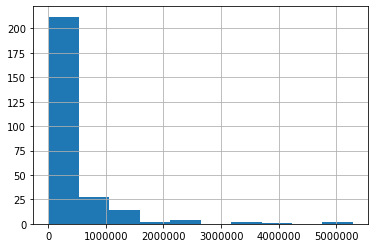

count    2.640000e+02
mean     4.307551e+05
std      6.611081e+05
min      6.144000e+03
25%      1.000960e+05
50%      2.373120e+05
75%      4.424960e+05
max      5.286262e+06
Name: length, dtype: float64

In [9]:
df['length'].hist()
plt.show()
df['length'].describe()

In [10]:
# We set window to 6.144000e+03 frames as it's the minimum length among our audio files
df['windows'] = df['length'].apply(lambda x: int(x/6.144000e+03))
#df['windows'] = df['length']/6.144000e+03
df

file_id         genus        species          english_cname  \
0     132608      Acanthis        flammea         Common Redpoll   
1     132611      Acanthis        flammea         Common Redpoll   
2      35068      Acanthis        flammea         Common Redpoll   
3      82715  Acrocephalus      palustris          Marsh Warbler   
4      64685  Acrocephalus      palustris          Marsh Warbler   
5      64686  Acrocephalus      palustris          Marsh Warbler   
6     120664  Acrocephalus  schoenobaenus          Sedge Warbler   
7     120666  Acrocephalus  schoenobaenus          Sedge Warbler   
8      76767  Acrocephalus  schoenobaenus          Sedge Warbler   
9     124052  Acrocephalus     scirpaceus  Eurasian Reed Warbler   
10    124053  Acrocephalus     scirpaceus  Eurasian Reed Warbler   
11     27999  Acrocephalus     scirpaceus  Eurasian Reed Warbler   
12    113082    Aegithalos       caudatus        Long-tailed Tit   
13    101371    Aegithalos       caudatus        Long-tailed Tit   
14    128853    Aegithalos       caudatus        Long-tailed Tit   
15    123169        Alauda       arvensis       Eurasian Skylark   
16    123170        Alauda       arvensis       Eurasian Skylark   
17    158166        Alauda       arvensis       Eurasian Skylark   
18    138979        Anthus      pratensis           Meadow Pipit   
19     30614        Anthus      pratensis           Meadow Pipit   
20    142431        Anthus      pratensis           Meadow Pipit   
21     83705        Anthus      trivialis             Tree Pipit   
22     33395        Anthus      trivialis             Tree Pipit   
23     99299        Anthus      trivialis             Tree Pipit   
24    139552          Apus           apus           Common Swift   
25     67307          Apus           apus           Common Swift   
26     77645          Apus           apus           Common Swift   
27     94584        Branta     canadensis           Canada Goose   
28     35578        Branta     canadensis           Canada Goose   
29     95381        Branta     canadensis           Canada Goose   
..       ...           ...            ...                    ...   
234   102932        Sylvia          borin         Garden Warbler   
235    49443        Sylvia          borin         Garden Warbler   
236   146260        Sylvia          borin         Garden Warbler   
237   135521        Sylvia       communis     Common Whitethroat   
238    76740        Sylvia       communis     Common Whitethroat   
239    76742        Sylvia       communis     Common Whitethroat   
240   101932        Sylvia        curruca     Lesser Whitethroat   
241   101933        Sylvia        curruca     Lesser Whitethroat   
242   102278        Sylvia        curruca     Lesser Whitethroat   
243    41816        Tringa       glareola         Wood Sandpiper   
244   102868        Tringa       glareola         Wood Sandpiper   
245   102869        Tringa       glareola         Wood Sandpiper   
246    83912        Tringa        totanus        Common Redshank   
247    57919        Tringa        totanus        Common Redshank   
248   110167        Tringa        totanus        Common Redshank   
249   133872   Troglodytes    troglodytes          Eurasian Wren   
250    59776   Troglodytes    troglodytes          Eurasian Wren   
251    71024   Troglodytes    troglodytes          Eurasian Wren   
252   121168        Turdus        iliacus                Redwing   
253    27962        Turdus        iliacus                Redwing   
254    25119        Turdus        iliacus                Redwing   
255   127996        Turdus         merula       Common Blackbird   
256    72861        Turdus         merula       Common Blackbird   
257    94958        Turdus         merula       Common Blackbird   
258    96608        Turdus     philomelos            Song Thrush   
259   132392        Turdus     philomelos            Song Thrush   
260   146756        Turdus     philomelos            Song Thr

In [11]:
# To relax the problem we'll consider the genus as the label instead of the species
# We use 23 windows per genus to have a balanced data set

n_windows = df.groupby('species')['windows'].sum()
n_windows[0:50]
#print(type(n_windows))


species
aguimp           106
alpina            37
aluco            248
apiaster         135
apivorus          97
apricaria        296
apus             546
argentatus       122
arvensis        1731
ater             162
atra              60
atricapilla      156
borin            300
caeruleus        105
calandra         401
canadensis        57
cannabina        248
canorus           70
carduelis         94
caudatus         132
chloris          329
chloropus         84
citrinella       152
coelebs          118
colchicus         62
collybita        173
communis         220
corax            136
corone           106
curruca           38
curvirostra      106
decaocto         199
domesticus       103
europaea          91
europaeus       1050
familiaris        71
flammea           56
flava             20
fluviatilis      671
frugilegus       200
gallinago         68
glandarius       103
glareola         237
iliacus           73
lagopus          115
livia            122
major            202
marti

In [12]:
n_windows = df.groupby('species')['windows'].sum().min()
n_windows

20

In [13]:
df.groupby('species').sum()


file_id    latitude  longitute      length  windows
species                                                           
aguimp          285006  -46.799600  86.502000    654848.0      106
alpina          266995  175.060300  11.142900    238080.0       37
aluco           208582  169.011100  10.718900   1531392.0      248
apiaster        386646   83.414900  -1.410400    839168.0      135
apivorus        404889  141.059800  19.084400    600576.0       97
apricaria       170529  188.126200  56.500800   1829888.0      296
apus            284504  154.152400  24.962000   3363840.0      546
argentatus      406252  187.831400  34.924500    759808.0      122
arvensis        404505  162.383000  -1.670800  10640364.0     1731
ater            326049  157.627000  -5.986000   1006080.0      162
atra            206405  148.993800  16.029000    376320.0       60
atricapilla     289288  161.095800  -7.248600    967680.0      156
borin           298635  156.005225  -1.726587   1852416.0      300
caeruleus       217697  154.693600   0.053000    650240.0      105
calandra        372112  162.372800  -1.668300   2477568.0      401
canadensis      225543  155.070600   8.877300    363008.0       57
cannabina       373376  162.072800  -1.335600   1534976.0      248
canorus         205510  155.778460  -6.323659    439808.0       70
carduelis       365558  167.238500  -8.642700    585216.0       94
caudatus        343306  142.755800  19.561500    819712.0      132
chloris         252129  151.930600  -9.968700   2035200.0      329
chloropus       199020  164.177317  32.187134    518656.0       84
citrinella      349746  163.156000  -2.296700    941568.0      152
coelebs         286948  155.609300  -6.830500    736768.0      118
colchicus       423601  159.326200  37.754900    395264.0       62
collybita       347544  108.300500  -1.206100   1075156.0      173
communis        289003  161.494100  -5.294400   1357312.0      220
corax           250129  155.147800  46.508200    848896.0      136
corone          290997  155.878100  21.953000    657408.0      106
curruca         306143  165.420900  -4.791900    242688.0       38
...                ...         ...        ...         ...      ...
ostralegus      155812  166.334800  32.142800   1348096.0      218
palumbus        320222  151.695000  -5.459400   1662976.0      269
palustris       339880  329.484900  17.343700   1633792.0      264
perdix          134850  155.617700  33.429800    146944.0       23
philomelos      375756  157.416800  -0.869400   1377792.0      222
phoenicurus     230283  165.656700  -5.294400    942838.0      152
pica            299135  181.604130  52.800770    351744.0       56
pratensis       312024  173.982200  37.411600    912384.0      147
pyrrhula        343969  154.625800  32.992700    705024.0      114
regulus         235344  143.186025   1.314913    747008.0      120
ridibundus      403047  148.712400   9.708100   4781568.0      777
rubecula        234376  159.031700  -4.264700   1286144.0      208
rustica         471932  162.360000  -1.633500   1753600.0      284
schoeniclus     291178  162.847900  -2.464000    684544.0      110
schoenobaenus   318097  168.452900 -13.951100   6451574.0     1049
scirpaceus      276104  155.085700  -1.601100   3108864.0      504
sibilatrix      305731  164.895300  -6.951000    842240.0      136
squatarola      457927  149.390800  19.498000    363008.0       58
stellata        175723  179.379000  43.446000   2035712.0      331
striata         376559  148.646400  44.055800    251392.0       40
torquilla       374527  164.797600  51.548200   2635776.0      428
totanus         251998  200.247600 -12.356600   1376256.0      223
trivialis       216399  164.026200  12.848300    691200.0      111
trochilus       367885  161.893000  -7.990500   2555392.0      415
troglodytes     264672  158.567600  -3.869300   1136640.0      184
turtur          260269  135.316900  39.333500   1772032.0      287
urbicum         424606  128.109400   7.867100    367616.0     

In [14]:
# First we create all windows for each file id and partition them by species

windows = {}

for file_id in df['file_id']:
   
    wave = waves[file_id]
    species = df[df['file_id']==file_id]['genus'].values[0] + "_" + df[df['file_id']==file_id]['species'].values[0]
    print(species)
    print(wave)

    if species not in windows:
        windows[species] = []
    for i in range(0, int(len(wave)/6.144000e+03)):
        windows[species].append(wave[i:int(i+6.144000e+03)])
        

Acanthis_flammea
[-0.00079346  0.00216675  0.00128174 ...  0.00268555  0.0055542
  0.006073  ]
Acanthis_flammea
[-0.00515747  0.00366211  0.01422119 ...  0.03411865  0.04309082
  0.03945923]
Acanthis_flammea
[-0.03085327 -0.02276611 -0.00454712 ...  0.00512695  0.00137329
 -0.00482178]
Acrocephalus_palustris
[-0.04147339 -0.03237915 -0.00186157 ... -0.00186157 -0.00457764
 -0.00616455]
Acrocephalus_palustris
[-0.00637817  0.01095581  0.02429199 ... -0.01498413 -0.01394653
 -0.00735474]
Acrocephalus_palustris
[-0.03918457 -0.0241394  -0.00448608 ...  0.01025391  0.00622559
  0.00228882]
Acrocephalus_schoenobaenus
[ 0.03024292  0.04202271  0.04013062 ...  0.44821167  0.31738281
 -0.03756714]
Acrocephalus_schoenobaenus
[ 0.03460693  0.02087402  0.01504517 ...  0.01980591  0.00186157
 -0.01672363]
Acrocephalus_schoenobaenus
[-0.02346802 -0.00646973  0.00942993 ... -0.02096558 -0.00689697
  0.01489258]
Acrocephalus_scirpaceus
[-0.05682373  0.07571411  0.19543457 ...  0.06433105  0.08706665


Emberiza_schoeniclus
[-0.04544067 -0.02035522  0.01873779 ... -0.01150513 -0.01815796
 -0.0184021 ]
Emberiza_schoeniclus
[ 0.01797485  0.00299072 -0.01361084 ... -0.00198364 -0.00250244
 -0.00204468]
Emberiza_schoeniclus
[ 0.05853271  0.11392212  0.13049316 ...  0.0305481   0.0093689
 -0.01303101]
Erithacus_rubecula
[-0.03399658 -0.03469849 -0.01956177 ...  0.01098633 -0.01031494
 -0.03189087]
Erithacus_rubecula
[0.10650635 0.125      0.11584473 ... 0.03375244 0.03903198 0.03201294]
Erithacus_rubecula
[ 0.11889648  0.02102661 -0.08691406 ...  0.00671387  0.01724243
  0.02230835]
Fringilla_coelebs
[ 0.222229    0.0531311  -0.14846802 ... -0.00384521 -0.04171753
 -0.07507324]
Fringilla_coelebs
[-0.02316284 -0.1439209  -0.20257568 ... -0.06079102 -0.05871582
 -0.04849243]
Fringilla_coelebs
[-0.0668335  -0.17944336 -0.29486084 ...  0.11880493  0.05596924
 -0.03189087]
Fulica_atra
[-0.01834106 -0.05126953 -0.0774231  ...  0.0038147   0.00213623
  0.00067139]
Fulica_atra
[ 0.02505493 -0.0131

[ 0.05249023  0.07421875  0.01495361 ... -0.01416016 -0.01464844
 -0.01461792]
Regulus_regulus
[ 0.06155396 -0.05224609 -0.11672974 ...  0.04016113 -0.02706909
 -0.07147217]
Regulus_regulus
[-0.00531006 -0.01275635 -0.0112915  ...  0.00708008  0.00289917
 -0.00411987]
Sitta_europaea
[ 0.03997803  0.01086426 -0.02337646 ... -0.00445557  0.0020752
  0.00839233]
Sitta_europaea
[-0.05740356 -0.06430054 -0.05764771 ...  0.02975464  0.02581787
  0.00601196]
Sitta_europaea
[ 0.03994751  0.01626587 -0.00787354 ... -0.0173645  -0.03240967
 -0.04379272]
Streptopelia_decaocto
[0.01950073 0.01281738 0.00601196 ... 0.06027222 0.06246948 0.06307983]
Streptopelia_decaocto
[-0.00689697 -0.00531006 -0.00357056 ...  0.01498413  0.01333618
  0.01226807]
Streptopelia_decaocto
[0.01843262 0.01937866 0.02023315 ... 0.01278687 0.01257324 0.012146  ]
Streptopelia_turtur
[ 0.09783936  0.10110474  0.10595703 ... -0.03625488 -0.03466797
 -0.03179932]
Streptopelia_turtur
[0.009552   0.00863647 0.00747681 ... 0.00

In [15]:
print(type(windows))
print(type(windows['Alauda_arvensis']))
print(len((windows['Alauda_arvensis'][0])))
#print(windows)
print(len(windows))
print('Wave',wave)
print('Species', species)
print('Windows',windows)


<class 'dict'>
<class 'list'>
6144
88
Wave [ 0.15783691  0.12033081  0.05059814 ... -0.09609985 -0.10455322
 -0.10061646]
Species Vanellus_vanellus
Windows {'Acanthis_flammea': [array([-0.00079346,  0.00216675,  0.00128174, ..., -0.00387573,
       -0.00411987, -0.00094604]), array([ 0.00216675,  0.00128174,  0.00030518, ..., -0.00411987,
       -0.00094604,  0.00213623]), array([ 0.00128174,  0.00030518, -0.00067139, ..., -0.00094604,
        0.00213623,  0.00515747]), array([ 0.00030518, -0.00067139, -0.0015564 , ...,  0.00213623,
        0.00515747,  0.00671387]), array([-0.00067139, -0.0015564 , -0.00152588, ...,  0.00515747,
        0.00671387,  0.00488281]), array([-0.0015564 , -0.00152588, -0.00186157, ...,  0.00671387,
        0.00488281, -0.00030518]), array([-0.00152588, -0.00186157,  0.00112915, ...,  0.00488281,
       -0.00030518, -0.00180054]), array([-0.00186157,  0.00112915,  0.00183105, ..., -0.00030518,
       -0.00180054, -0.00241089]), array([ 0.00112915,  0.0018310

In [16]:
# We randomly pick 20 windows for each species

# Save other samples for testing

windows_fixed = {}
windows_fixed_test = {}

for species in windows.keys():
    windows_fixed[species] = []
    windows_fixed_test[species] = []
    ws = windows[species]
    index = np.random.choice(len(ws), n_windows, replace=False)# False is used when you do't want the elements to be repeated, n_windows/2
    

    for i in range(0, len(ws)): #SPLITTING WINDOWS IN TWO DIFFERENT DICTIONARIES- TEST AND TRAIN 

        if i in index:
            windows_fixed[species].append(ws[i])
        else:
            windows_fixed_test[species].append(ws[i])        
print('ws', ws)
print('windows_fixed',windows_fixed)
print('windows_fixed_test',windows_fixed_test)

ws [array([0.02206421, 0.02960205, 0.02044678, ..., 0.01254272, 0.01135254,
       0.00820923]), array([ 0.02960205,  0.02044678, -0.00195312, ...,  0.01135254,
        0.00820923,  0.00085449]), array([ 0.02044678, -0.00195312, -0.02883911, ...,  0.00820923,
        0.00085449, -0.01080322]), array([-0.00195312, -0.02883911, -0.04870605, ...,  0.00085449,
       -0.01080322, -0.02432251]), array([-0.02883911, -0.04870605, -0.05114746, ..., -0.01080322,
       -0.02432251, -0.03479004]), array([-0.04870605, -0.05114746, -0.03121948, ..., -0.02432251,
       -0.03479004, -0.03701782]), array([-0.05114746, -0.03121948,  0.00668335, ..., -0.03479004,
       -0.03701782, -0.02886963]), array([-0.03121948,  0.00668335,  0.04858398, ..., -0.03701782,
       -0.02886963, -0.01315308]), array([ 0.00668335,  0.04858398,  0.07592773, ..., -0.02886963,
       -0.01315308,  0.003479  ]), array([ 0.04858398,  0.07592773,  0.07492065, ..., -0.01315308,
        0.003479  ,  0.01397705]), array([0.075

windows_fixed {'Acanthis_flammea': [array([ 0.00128174,  0.00030518, -0.00067139, ..., -0.00094604,
        0.00213623,  0.00515747]), array([-0.00152588, -0.00186157,  0.00112915, ...,  0.00488281,
       -0.00030518, -0.00180054]), array([ 0.00482178,  0.00610352,  0.00259399, ..., -0.00317383,
        0.00082397,  0.00344849]), array([ 9.15527344e-05, -6.71386719e-04, -1.83105469e-04, ...,
        5.24902344e-03,  7.26318359e-03,  8.02612305e-03]), array([-0.00067139, -0.00018311,  0.00039673, ...,  0.00726318,
        0.00802612,  0.00598145]), array([ 0.00039673, -0.00018311, -0.00119019, ...,  0.00598145,
        0.00271606, -0.0032959 ]), array([-0.00213623, -0.0020752 ,  0.0017395 , ..., -0.00408936,
       -0.00244141,  0.00524902]), array([ 0.00146484, -0.0012207 , -0.00112915, ...,  0.01580811,
        0.0206604 ,  0.02001953]), array([ 0.00326538,  0.00396729,  0.00515747, ..., -0.01370239,
       -0.00628662,  0.00894165]), array([0.0078125 , 0.0067749 , 0.00192261, ..., 0

windows_fixed_test {'Acanthis_flammea': [array([-0.00079346,  0.00216675,  0.00128174, ..., -0.00387573,
       -0.00411987, -0.00094604]), array([ 0.00216675,  0.00128174,  0.00030518, ..., -0.00411987,
       -0.00094604,  0.00213623]), array([ 0.00030518, -0.00067139, -0.0015564 , ...,  0.00213623,
        0.00515747,  0.00671387]), array([-0.00067139, -0.0015564 , -0.00152588, ...,  0.00515747,
        0.00671387,  0.00488281]), array([-0.0015564 , -0.00152588, -0.00186157, ...,  0.00671387,
        0.00488281, -0.00030518]), array([-0.00186157,  0.00112915,  0.00183105, ..., -0.00030518,
       -0.00180054, -0.00241089]), array([ 0.00112915,  0.00183105,  0.00482178, ..., -0.00180054,
       -0.00241089, -0.00317383]), array([ 0.00183105,  0.00482178,  0.00610352, ..., -0.00241089,
       -0.00317383,  0.00082397]), array([6.10351562e-03, 2.59399414e-03, 9.15527344e-05, ...,
       8.23974609e-04, 3.44848633e-03, 5.24902344e-03]), array([ 2.59399414e-03,  9.15527344e-05, -6.713867

In [17]:
print(index)
print(windows_fixed)
#print('Shape',windows_fixed.shape)

[ 45  99  35  90   0  61  37  22  13  39  65 103  96  77  62   9  78  34
   8 105]
{'Acanthis_flammea': [array([ 0.00128174,  0.00030518, -0.00067139, ..., -0.00094604,
        0.00213623,  0.00515747]), array([-0.00152588, -0.00186157,  0.00112915, ...,  0.00488281,
       -0.00030518, -0.00180054]), array([ 0.00482178,  0.00610352,  0.00259399, ..., -0.00317383,
        0.00082397,  0.00344849]), array([ 9.15527344e-05, -6.71386719e-04, -1.83105469e-04, ...,
        5.24902344e-03,  7.26318359e-03,  8.02612305e-03]), array([-0.00067139, -0.00018311,  0.00039673, ...,  0.00726318,
        0.00802612,  0.00598145]), array([ 0.00039673, -0.00018311, -0.00119019, ...,  0.00598145,
        0.00271606, -0.0032959 ]), array([-0.00213623, -0.0020752 ,  0.0017395 , ..., -0.00408936,
       -0.00244141,  0.00524902]), array([ 0.00146484, -0.0012207 , -0.00112915, ...,  0.01580811,
        0.0206604 ,  0.02001953]), array([ 0.00326538,  0.00396729,  0.00515747, ..., -0.01370239,
       -0.00628

In [18]:
print(windows_fixed_test)

{'Acanthis_flammea': [array([-0.00079346,  0.00216675,  0.00128174, ..., -0.00387573,
       -0.00411987, -0.00094604]), array([ 0.00216675,  0.00128174,  0.00030518, ..., -0.00411987,
       -0.00094604,  0.00213623]), array([ 0.00030518, -0.00067139, -0.0015564 , ...,  0.00213623,
        0.00515747,  0.00671387]), array([-0.00067139, -0.0015564 , -0.00152588, ...,  0.00515747,
        0.00671387,  0.00488281]), array([-0.0015564 , -0.00152588, -0.00186157, ...,  0.00671387,
        0.00488281, -0.00030518]), array([-0.00186157,  0.00112915,  0.00183105, ..., -0.00030518,
       -0.00180054, -0.00241089]), array([ 0.00112915,  0.00183105,  0.00482178, ..., -0.00180054,
       -0.00241089, -0.00317383]), array([ 0.00183105,  0.00482178,  0.00610352, ..., -0.00241089,
       -0.00317383,  0.00082397]), array([6.10351562e-03, 2.59399414e-03, 9.15527344e-05, ...,
       8.23974609e-04, 3.44848633e-03, 5.24902344e-03]), array([ 2.59399414e-03,  9.15527344e-05, -6.71386719e-04, ...,
      

In [19]:
# Extract Features from Window for train
new_dataset = pd.DataFrame()

for species in windows_fixed.keys():
    for i in range(0,n_windows): #loop runs till 20 
        data_point = {'species':species.split('_')[1], 'genus':species.split('_')[0]}
        spec_centroid = feature.spectral_centroid(windows_fixed[species][i])[0] ## 
        chroma = feature.chroma_stft(windows_fixed[species][i], samplerate) ## 
        for j in range(0,13):
            data_point['spec_centr_'+str(j)] = spec_centroid[j]
            for k in range(0,12):
                data_point['chromogram_'+str(k)+"_"+str(j)] = chroma[k,j]
        new_dataset = new_dataset.append(data_point,ignore_index=True)

new_dataset.head()

C:\Users\HP\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


chromogram_0_0  chromogram_0_1  chromogram_0_10  chromogram_0_11  \
0        1.000000        0.833207         0.770394         0.702116   
1        1.000000        0.945205         0.744401         0.716860   
2        0.996255        0.839120         0.760417         0.705142   
3        1.000000        0.834264         0.761191         0.706938   
4        0.984271        0.828103         0.760350         0.707806   

   chromogram_0_12  chromogram_0_2  chromogram_0_3  chromogram_0_4  \
0         0.655413        0.326867        0.922793        0.313101   
1         0.701898        0.315170        0.885456        0.275877   
2         0.662990        0.329859        0.924461        0.300951   
3         0.657560        0.334726        0.931461        0.303209   
4         0.657066        0.335476        0.932248        0.302352   

   chromogram_0_5  chromogram_0_6   ...     spec_centr_12  spec_centr_2  \
0        0.493068        0.167065   ...       2503.140943   2731.402739   
1        0.519047        0.170131   ...       2503.521700   2730.815330   
2        0.493679        0.167647   ...       2490.339399   2730.212864   
3        0.491536        0.167933   ...       2505.396552   2729.750957   
4        0.491400        0.168035   ...       2500.161652   2729.595026   

   spec_centr_3  spec_centr_4  spec_centr_5  spec_centr_6  spec_centr_7  \
0   2610.782378   2702.360640   2675.551167   2817.795126   2708.001038   
1   2610.216161   2703.054782   2676.112023   2818.189760   2706.744520   
2   2609.668564   2703.721292   2676.695013   2818.554958   2705.497472   
3   2609.269953   2704.203119   2677.149846   2818.810102   2704.568670   
4   2609.139582   2704.360280   2677.306261   2818.891611   2704.260327   

   spec_centr_8  spec_centr_9  species  
0   2738.732677   2687.312293  flammea  
1   2740.128440   2685.521406  flammea  
2   2741.509333   2683.727859  flammea  
3   2742.535029   2682.381411  flammea  
4   2742.874986   2681.932246  flammea  

[5 rows x 171 columns]

In [20]:
#sc= [1,2,3,5]
#sc[2]
#type(sc[2])
print(windows_fixed[species][1])
print('fs',feature.spectral_centroid(windows_fixed[species][1])[0])

[ 0.00668335  0.04858398  0.07592773 ... -0.02886963 -0.01315308
  0.003479  ]
fs [2355.04661268 2229.31337445 2051.40580544 2087.47713645 2256.74587959
 2129.34996181 1962.60034593 2003.05756161 2383.08632727 2338.05996046
 2229.7276953  2208.08692594 2133.76717812]


In [21]:
print(len(new_dataset))
print('DP',data_point)

1760
DP {'species': 'vanellus', 'genus': 'Vanellus', 'spec_centr_0': 2016.5248578053438, 'chromogram_0_0': 0.01572029438641012, 'chromogram_1_0': 0.033288309501193915, 'chromogram_2_0': 0.01930296123651294, 'chromogram_3_0': 0.042831489954255, 'chromogram_4_0': 0.0200984914438754, 'chromogram_5_0': 0.00815427468769061, 'chromogram_6_0': 0.019574994185622863, 'chromogram_7_0': 0.04387839338008566, 'chromogram_8_0': 0.10409662109970204, 'chromogram_9_0': 0.2750360731925695, 'chromogram_10_0': 1.0, 'chromogram_11_0': 0.3433717530050805, 'spec_centr_1': 2257.045978674117, 'chromogram_0_1': 0.024700588966070264, 'chromogram_1_1': 0.03548718370434289, 'chromogram_2_1': 0.029337518586035744, 'chromogram_3_1': 0.06487342475966872, 'chromogram_4_1': 0.039247386811310105, 'chromogram_5_1': 0.012197365215882602, 'chromogram_6_1': 0.021991846538550897, 'chromogram_7_1': 0.06403171366109464, 'chromogram_8_1': 0.32806735270701665, 'chromogram_9_1': 0.3375238029442223, 'chromogram_10_1': 1.0, 'chromo

In [22]:
print(spec_centroid)
print(len(spec_centroid))
print('Chroma',chroma)

[2016.52485781 2257.04597867 2452.31661612 2401.71929951 2356.72079634
 2410.35830894 2498.18669764 2539.45217414 2518.05270463 2464.58357715
 2457.48284445 2354.83386803 2265.64613755]
13
Chroma [[1.57202944e-02 2.47005890e-02 1.15165732e-02 6.10545307e-03
  5.36978657e-03 2.58836683e-03 2.39044897e-02 3.05267249e-01
  1.00000000e+00 1.00000000e+00 5.59375561e-01 1.54611492e-01
  1.10701598e-01]
 [3.32883095e-02 3.54871837e-02 1.88538806e-02 7.24818222e-03
  5.13133810e-03 3.33203562e-03 4.10048298e-03 1.19129547e-02
  6.21164832e-02 6.59408797e-02 1.78829683e-02 5.26869829e-03
  1.10106026e-02]
 [1.93029612e-02 2.93375186e-02 1.84585097e-02 9.33635384e-03
  5.67285713e-03 2.52591348e-03 1.95866500e-03 2.72756150e-03
  2.96869690e-03 2.48335119e-03 3.14468580e-03 3.67070369e-03
  6.42354011e-03]
 [4.28314900e-02 6.48734248e-02 1.23357316e-02 2.48237193e-03
  4.26918938e-03 6.60384518e-03 1.03517998e-02 6.60214204e-03
  1.61758897e-03 9.26471676e-04 4.35108618e-03 7.52903006e-03
  9.90

In [23]:
print(len(spec_centroid))
print(len(chroma))
print(chroma.shape)
print(len(windows_fixed['Aegithalos_caudatus']))
print(len(windows_fixed_test['Aegithalos_caudatus']))
print(len(windows['Aegithalos_caudatus']))

13
12
(12, 13)
20
112
132


In [24]:
# Extract Features from Window for test
new_dataset_test = pd.DataFrame()

for species in windows_fixed_test.keys():
    for i in range(0,len(windows_fixed_test[species])):
        data_point = {'species':species.split('_')[1], 'genus':species.split('_')[0]}
        spec_centroid = feature.spectral_centroid(windows_fixed_test[species][i])[0]
        chroma = feature.chroma_stft(windows_fixed_test[species][i], samplerate)
        for j in range(0,13):
            data_point['spec_centr_'+str(j)] = spec_centroid[j]
            for k in range(0,12):
                data_point['chromogram_'+str(k)+"_"+str(j)] = chroma[k,j]
        new_dataset_test = new_dataset_test.append(data_point,ignore_index=True)

new_dataset_test.head()

C:\Users\HP\Anaconda3\lib\site-packages\librosa\core\pitch.py:145: UserWarning: Trying to estimate tuning from empty frequency set.
  warnings.warn('Trying to estimate tuning from empty frequency set.')


chromogram_0_0  chromogram_0_1  chromogram_0_10  chromogram_0_11  \
0        1.000000        0.945011         0.749241         0.714737   
1        0.650246        0.590960         0.712450         0.909643   
2        0.991786        0.829836         0.769562         0.702360   
3        0.982724        0.826884         0.768729         0.702757   
4        0.986246        0.828101         0.767894         0.703366   

   chromogram_0_12  chromogram_0_2  chromogram_0_3  chromogram_0_4  \
0         0.704973        0.311386        0.881971        0.280575   
1         0.727013        0.502476        1.000000        0.242925   
2         0.658253        0.327552        0.923582        0.312167   
3         0.662904        0.328242        0.924370        0.311239   
4         0.664334        0.328939        0.925159        0.310319   

   chromogram_0_5  chromogram_0_6   ...     spec_centr_12  spec_centr_2  \
0        0.519973        0.170108   ...       2486.230223   2731.690858   
1        0.337245        0.167843   ...       2502.704268   2731.547262   
2        0.492926        0.167125   ...       2500.947915   2731.257282   
3        0.492785        0.167188   ...       2501.371362   2731.110899   
4        0.492645        0.167255   ...       2502.520326   2730.963584   

   spec_centr_3  spec_centr_4  spec_centr_5  spec_centr_6  spec_centr_7  \
0   2611.073052   2702.003237   2675.278369   2817.586461   2708.632709   
1   2610.927073   2702.182796   2675.414148   2817.691756   2708.316600   
2   2610.638981   2702.536770   2675.689443   2817.896605   2707.686054   
3   2610.496832   2702.711164   2675.828998   2817.996191   2707.371616   
4   2610.355897   2702.883833   2675.969849   2818.093899   2707.057771   

   spec_centr_8  spec_centr_9  species  
0   2738.029236   2688.206943  flammea  
1   2738.381425   2687.759668  flammea  
2   2739.083012   2686.864795  flammea  
3   2739.432406   2686.417157  flammea  
4   2739.780883   2685.969365  flammea  

[5 rows x 171 columns]

In [25]:
# Prepare dataset to fit a simple model

features= list(new_dataset.columns) 
features.remove('species')
features.remove('genus')

X = new_dataset[features].values
y = new_dataset['species'].values
#print(features)
print (type(X))
print (X.shape)
X_test = new_dataset_test[features].values
y_test = new_dataset_test['species'].values

<class 'numpy.ndarray'>
(1760, 169)


In [26]:
X_test

array([[1.00000000e+00, 9.45011297e-01, 7.49241134e-01, ...,
        2.70863271e+03, 2.73802924e+03, 2.68820694e+03],
       [6.50246025e-01, 5.90959645e-01, 7.12450455e-01, ...,
        2.70831660e+03, 2.73838143e+03, 2.68775967e+03],
       [9.91786381e-01, 8.29836490e-01, 7.69561750e-01, ...,
        2.70768605e+03, 2.73908301e+03, 2.68686479e+03],
       ...,
       [1.86367164e-02, 3.02847808e-02, 6.70426874e-01, ...,
        2.53976506e+03, 2.51719371e+03, 2.46464932e+03],
       [1.54451537e-02, 3.45903314e-02, 7.95195324e-01, ...,
        2.53980857e+03, 2.51706961e+03, 2.46465965e+03],
       [1.54744026e-02, 3.79585478e-02, 8.65245716e-01, ...,
        2.53985169e+03, 2.51694514e+03, 2.46467023e+03]])

In [27]:
# Use Naive Bayes as benchmark 

from sklearn import naive_bayes
NB = naive_bayes.GaussianNB()

SSS = sklearn.model_selection.StratifiedShuffleSplit(n_splits=2, test_size=0.2)

    
accs = [] 

for train_index, val_index in SSS.split(X, y):
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    NB.fit(X_train, y_train)
    
    y_pred = NB.predict(X_val)
    
    accs.append(sklearn.metrics.accuracy_score(y_pred=y_pred, y_true=y_val))
    
print(accs)

[0.8835227272727273, 0.9090909090909091]


In [28]:
y_pred = NB.predict(X_test)
a=sklearn.metrics.accuracy_score(y_pred=y_pred, y_true=y_test)
y_pred

array(['flammea', 'flammea', 'flammea', ..., 'curruca', 'curruca',
       'curruca'], dtype='<U13')

In [29]:
print(a)

0.8697221219776254


In [30]:
# The data can be used to predict, let's export the newly created datasets

new_dataset.to_csv("train.csv")
new_dataset.to_csv("test.csv")

In [31]:
y_pred=NB.predict([[1.00000000e+00, 8.33207262e-01, 7.70393975e-01, 7.02116018e-01,
       6.55412698e-01, 3.26867328e-01, 9.22792706e-01, 3.13101050e-01,
       4.93067740e-01, 1.67065462e-01, 5.62087607e-01, 3.96560431e-01,
       4.47105277e-01, 4.02711827e-01, 5.06300977e-01, 3.80522615e-01,
       4.19544220e-01, 5.52227911e-01, 1.67997784e-01, 2.29230780e-01,
       1.13429109e-01, 8.61854077e-01, 2.61876425e-01, 2.01713863e-01,
       2.10234578e-01, 2.30222354e-01, 9.97615596e-01, 1.00000000e+00,
       7.74528056e-01, 8.52259804e-01, 1.00000000e+00, 2.79948319e-01,
       6.74404350e-01, 2.47360164e-01, 1.00000000e+00, 2.29524827e-01,
       4.13700958e-01, 3.95900010e-01, 4.45418801e-01, 6.01185413e-01,
       5.01579272e-01, 7.81532883e-01, 9.56159470e-01, 7.07607958e-01,
       5.74976127e-01, 1.00000000e+00, 2.50267187e-01, 3.32855976e-01,
       1.75150898e-01, 5.44073004e-01, 3.59902635e-01, 4.81695591e-01,
       3.04493715e-01, 3.02197435e-01, 9.86724436e-01, 1.00000000e+00,
       5.47620721e-01, 7.70225896e-01, 8.68378514e-01, 1.42610659e-01,
       2.42454347e-01, 2.55086071e-01, 5.39727597e-01, 3.50952866e-01,
       6.80633720e-01, 1.46240490e-01, 2.31592822e-01, 1.00000000e+00,
       8.68279631e-01, 3.81756202e-01, 5.76690275e-01, 5.10679884e-01,
       7.11824098e-02, 4.55393090e-01, 5.95406681e-01, 7.05044867e-01,
       3.56009781e-01, 7.25065649e-01, 9.30281352e-02, 3.38097703e-01,
       6.48295098e-01, 5.11998465e-01, 2.02967031e-01, 5.78833683e-01,
       3.56601888e-01, 4.13792867e-02, 7.92751242e-01, 9.55117213e-01,
       8.85522650e-01, 3.58788962e-01, 4.85089007e-01, 9.53690771e-02,
       5.74637030e-01, 4.08574708e-01, 2.77181458e-01, 9.67072879e-02,
       8.99735404e-01, 4.78524816e-01, 1.46974317e-01, 8.06472915e-01,
       1.00000000e+00, 9.37192857e-01, 4.70158779e-01, 3.93459274e-01,
       6.55086592e-02, 4.90125394e-01, 2.22384754e-01, 1.54594772e-01,
       3.77811288e-02, 1.00000000e+00, 7.16520607e-01, 8.45714874e-01,
       7.68815444e-01, 8.65752794e-01, 1.00000000e+00, 4.86800816e-01,
       3.23888094e-01, 3.02473224e-02, 2.33954335e-01, 2.02368068e-01,
       1.80623594e-01, 2.91176130e-02, 6.53290269e-01, 6.68642999e-01,
       1.00000000e+00, 5.87842912e-01, 5.06210456e-01, 5.77170927e-01,
       8.38108114e-01, 7.49895589e-01, 2.51869551e-02, 9.48679523e-02,
       3.96180757e-01, 4.37434360e-01, 7.16952349e-02, 2.24648760e-01,
       2.10233885e-01, 2.12027943e-01, 2.47980260e-01, 4.25320956e-01,
       2.59218463e-01, 1.00000000e+00, 1.00000000e+00, 6.60293645e-02,
       1.45302145e-01, 2.60478364e-01, 3.11302009e-01, 1.59228175e-01,
       1.18702684e-01, 7.52523410e-02, 5.02052265e-02, 4.46934040e-01,
       6.04469352e-01, 2.57465303e-01, 2.36372956e-01, 2.34123412e-01,
       2.44852446e+03, 2.61798300e+03, 2.58353869e+03, 2.62418321e+03,
       2.50314094e+03, 2.73140274e+03, 2.61078238e+03, 2.70236064e+03,
       2.67555117e+03, 2.81779513e+03, 2.70800104e+03, 2.73873268e+03,
       2.68731229e+03]])

In [32]:
y_pred

array(['flammea'], dtype='<U13')

In [33]:
y_pred=NB.predict([[6.50246025e-01, 5.90959645e-01, 7.12450455e-01, 9.09643220e-01,
       7.27013285e-01, 5.02476042e-01, 1.00000000e+00, 2.42925227e-01,
       3.37245137e-01, 1.67843353e-01, 5.37516842e-01, 3.35646545e-01,
       3.98840611e-01, 8.51159735e-01, 1.00000000e+00, 6.89815063e-01,
       8.13982300e-01, 1.00000000e+00, 2.57332583e-01, 5.84855099e-01,
       1.97693631e-01, 1.00000000e+00, 2.38709062e-01, 3.53068661e-01,
       3.37248505e-01, 3.72750759e-01, 1.00000000e+00, 9.69904674e-01,
       7.43664329e-01, 7.20849869e-01, 7.23750989e-01, 3.07422680e-01,
       8.73910074e-01, 2.71187601e-01, 5.30654133e-01, 1.70160582e-01,
       5.44333154e-01, 3.81181928e-01, 3.99810064e-01, 3.54008904e-01,
       3.72434973e-01, 9.24667476e-01, 1.00000000e+00, 5.88519005e-01,
       7.51587156e-01, 9.11088629e-01, 1.43049927e-01, 2.24896398e-01,
       2.14135704e-01, 5.01269497e-01, 3.12611618e-01, 5.95670801e-01,
       1.69055747e-01, 2.56094643e-01, 1.00000000e+00, 9.13640137e-01,
       4.19407764e-01, 6.04408165e-01, 5.72095549e-01, 7.39197746e-02,
       3.58515656e-01, 4.91593607e-01, 6.14065856e-01, 3.19912646e-01,
       6.89563633e-01, 9.50611887e-02, 3.26836313e-01, 7.12707399e-01,
       5.94875324e-01, 2.44461133e-01, 5.31432217e-01, 3.53146459e-01,
       3.71111791e-02, 6.88513915e-01, 8.87387312e-01, 8.29822539e-01,
       3.16201646e-01, 4.92743547e-01, 9.36585271e-02, 5.91972191e-01,
       4.31827662e-01, 3.17352475e-01, 1.17326898e-01, 8.33469819e-01,
       4.50627302e-01, 8.56758002e-02, 7.88093333e-01, 1.00000000e+00,
       8.77781621e-01, 4.01444494e-01, 3.68659662e-01, 7.38317309e-02,
       5.90992471e-01, 2.48616716e-01, 1.70984854e-01, 4.74163362e-02,
       1.00000000e+00, 6.55152505e-01, 5.75493904e-01, 7.00743766e-01,
       8.99084297e-01, 1.00000000e+00, 4.48165286e-01, 3.01735070e-01,
       3.42919631e-02, 3.12140498e-01, 1.81264314e-01, 1.63318473e-01,
       2.87905209e-02, 7.56934046e-01, 7.43354967e-01, 1.00000000e+00,
       6.53221690e-01, 5.93250849e-01, 6.77703774e-01, 6.44212146e-01,
      5.50710723e-01, 2.41600225e-02, 1.19611209e-01, 3.53174348e-01,
      3.91104777e-01, 6.16990362e-02, 2.85693755e-01, 2.86566991e-01,
      2.90868645e-01, 2.39721242e-01, 3.63194025e-01, 2.69811717e-01,
      1.00000000e+00, 1.00000000e+00, 4.30805713e-02, 1.26076894e-01,
      2.97685237e-01, 3.70665183e-01, 1.31701286e-01, 1.20063259e-01,
       7.75879995e-02, 4.76343531e-02, 3.74171534e-01, 6.38932902e-01,
       2.66756050e-01, 3.20606104e-01, 3.24047694e-01, 2.73121714e-01,
       4.25426651e-01, 2.96417998e-01, 3.44600398e-01, 4.50420319e-01,
       1.50033337e-01, 1.73546968e-01, 8.11339244e-02, 6.94419769e-01,
       2.98938750e-01, 1.83439990e-01, 1.58239836e-01, 1.68125522e-01,
       2.43981604e+03, 2.61555717e+03, 2.58324281e+03, 2.62237090e+03,
       2.50270427e+03, 2.73154726e+03, 2.61092707e+03, 2.70218280e+03,
       2.67541415e+03, 2.81769176e+03, 2.70831660e+03, 2.73838143e+03,
      2.68775967e+03]])


In [34]:
y_pred

array(['flammea'], dtype='<U13')

In [35]:
X_test[1]

array([6.50246025e-01, 5.90959645e-01, 7.12450455e-01, 9.09643220e-01,
       7.27013285e-01, 5.02476042e-01, 1.00000000e+00, 2.42925227e-01,
       3.37245137e-01, 1.67843353e-01, 5.37516842e-01, 3.35646545e-01,
       3.98840611e-01, 8.51159735e-01, 1.00000000e+00, 6.89815063e-01,
       8.13982300e-01, 1.00000000e+00, 2.57332583e-01, 5.84855099e-01,
       1.97693631e-01, 1.00000000e+00, 2.38709062e-01, 3.53068661e-01,
       3.37248505e-01, 3.72750759e-01, 1.00000000e+00, 9.69904674e-01,
       7.43664329e-01, 7.20849869e-01, 7.23750989e-01, 3.07422680e-01,
       8.73910074e-01, 2.71187601e-01, 5.30654133e-01, 1.70160582e-01,
       5.44333154e-01, 3.81181928e-01, 3.99810064e-01, 3.54008904e-01,
       3.72434973e-01, 9.24667476e-01, 1.00000000e+00, 5.88519005e-01,
       7.51587156e-01, 9.11088629e-01, 1.43049927e-01, 2.24896398e-01,
       2.14135704e-01, 5.01269497e-01, 3.12611618e-01, 5.95670801e-01,
       1.69055747e-01, 2.56094643e-01, 1.00000000e+00, 9.13640137e-01,
      

In [36]:
y_pred

array(['flammea'], dtype='<U13')

In [37]:
X_test.dtype

dtype('float64')